1st column is the acceleration data in the X axis measured by the sensor ADXL345.
2nd column is the acceleration data in the Y axis measured by the sensor ADXL345.
3rd column is the acceleration data in the Z axis measured by the sensor ADXL345.

4th column is the rotation data in the X axis measured by the sensor ITG3200.
5th column is the rotation data in the Y axis measured by the sensor ITG3200.
6th column is the rotation data in the Z axis measured by the sensor ITG3200.

7th column is the acceleration data in the X axis measured by the sensor MMA8451Q.
8th column is the acceleration data in the Y axis measured by the sensor MMA8451Q.
9th column is the acceleration data in the Z axis measured by the sensor MMA8451Q.

File name format:
**<ADL OR FALL_CODE>_<SUBJECT_ID>_<TRIAL_NO>.txt**

**Activities of Daily Living (ADL):**

<!-- <div align="center"> -->

| Code | Activity                                                                                 | Trials | Duration |
|:----:|------------------------------------------------------------------------------------------|:------:|:--------:|
| D01  | Walking slowly                                                                           | 1      | 100s     |
| D02  | Walking quickly                                                                          | 1      | 100s     |
| D03  | Jogging slowly                                                                           | 1      | 100s     |
| D04  | Jogging quickly                                                                          | 1      | 100s     |
| D05  | Walking upstairs and downstairs slowly                                                   | 5      | 25s      |
| D06  | Walking upstairs and downstairs quickly                                                  | 5      | 25s      |
| D07  | Slowly sit in a half height chair, wait a moment, and up slowly                          | 5      | 12s      |
| D08  | Quickly sit in a half height chair, wait a moment, and up quickly                        | 5      | 12s      |
| D09  | Slowly sit in a low height chair, wait a moment, and up slowly                           | 5      | 12s      |
| D10  | Quickly sit in a low height chair, wait a moment, and up quickly                         | 5      | 12s      |
| D11  | Sitting a moment, trying to get up, and collapse into a chair                            | 5      | 12s      |
| D12  | Sitting a moment, lying slowly, wait a moment, and sit again                             | 5      | 12s      |
| D13  | Sitting a moment, lying quickly, wait a moment, and sit again                            | 5      | 12s      |
| D14  | Being on one's back change to lateral position, wait a moment, and change to one's back  | 5      | 12s      |
| D15  | Standing, slowly bending at knees, and getting up                                        | 5      | 12s      |
| D16  | Standing, slowly bending without bending knees, and getting up                           | 5      | 12s      |
| D17  | Standing, get into a car, remain seated and get out of the car                           | 5      | 25s      |
| D18  | Stumble while walking                                                                    | 5      | 12s      |
| D19  | Gently jump without falling (trying to reach a high object)                              | 5      | 12s      |


Falls:

| Code | Activity                                                                                 | Trials | Duration |
|:----:|------------------------------------------------------------------------------------------|:------:|:--------:|
| F01  | Fall forward while walking caused by a slip                                              | 5      | 15s      |
| F02  | Fall backward while walking caused by a slip                                             | 5      | 15s      |
| F03  | Lateral fall while walking caused by a slip                                              | 5      | 15s      |
| F04  | Fall forward while walking caused by a trip                                              | 5      | 15s      |
| F05  | Fall forward while jogging caused by a trip                                              | 5      | 15s      |
| F06  | Vertical fall while walking caused by fainting                                           | 5      | 15s      |
| F07  | Fall while walking, with use of hands in a table to dampen fall, caused by fainting      | 5      | 15s      |
| F08  | Fall forward when trying to get up                                                       | 5      | 15s      |
| F09  | Lateral fall when trying to get up                                                       | 5      | 15s      |
| F10  | Fall forward when trying to sit down                                                     | 5      | 15s      |
| F11  | Fall backward when trying to sit down                                                    | 5      | 15s      |
| F12  | Lateral fall when trying to sit down                                                     | 5      | 15s      |
| F13  | Fall forward while sitting, caused by fainting or falling asleep                         | 5      | 15s      |
| F14  | Fall backward while sitting, caused by fainting or falling asleep                        | 5      | 15s      |
| F15  | Lateral fall while sitting, caused by fainting or falling asleep                         | 5      | 15s      |
<!-- </div> -->

File name format:

**<ADL OR FALL_CODE>_<SUBJECT_ID>_<TRIAL_NO>.txt**

- 23 adult subject    ---> SA01 ~ SA23
- 15 elderly subject  ---> SE01~ SE15

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import zipfile
import functions as fn

# for zip file:

In [ ]:
# Path to zip file
zip_file_path = '/Volumes/Windows SD/Master SSE/Semester 2/Fall Detection/DataSet.zip'

# Base path to the dataset folder structure *inside* the zip file
base_path_in_zip = 'DataSet/SisFall_dataset' 

# Create list of folder names (SA01 to SA23 and SE01 to SE15)
subject_ids = [f'SA{str(i).zfill(2)}' for i in range(1, 24)] + [f'SE{str(i).zfill(2)}' for i in range(1, 16)]

all_data = []               # List to store all data (each item is a 2D array from a file)
all_labels = []             # List to store labels corresponding to each data array
activity_code_list = []     # List to store activity codes
adls = []                   # List to store ADL data
falls = []                  # List to store Fall data

counter = 0
ADL = 0
FALL = 0

try:
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        for subject_id in subject_ids:
            folder_path_in_zip = os.path.join(base_path_in_zip, subject_id)

            for item in zip_ref.namelist():
                if item.startswith(folder_path_in_zip + '/') and item.endswith('.txt'):
                    filename_with_path = item
                    filename = os.path.basename(filename_with_path)

                    try:
                        # Extract activity code from filename (assuming format is like 'D01_01.txt')
                        activity_code = filename.split('_')[0]
                        activity_code_list.append(activity_code)

                        # Open the file within the zip and read it with pandas
                        with zip_ref.open(filename_with_path) as file:
                            df = pd.read_csv(file, header=None, delimiter=',', usecols=[0, 1, 2, 3, 4, 5], on_bad_lines='skip')
                            data = df.to_numpy()    # Convert to NumPy array
                            data = data.transpose()  # Transpose the data to get the desired shape

                            # determine label
                            if activity_code.startswith('D'):
                                adls.append(data)
                                label = 'ADL'
                                ADL += 1
                            elif activity_code.startswith('F'):
                                falls.append(data)
                                label = 'Fall'
                                FALL += 1
                            else:
                                label = 'Unknown'

                            # Append the 2D array to the list
                            all_data.append(data)
                            all_labels.append(label)
                            counter += 1
                            print(f'\rProgress: {counter}/{4505} files processed', end='')

                    except Exception as e:
                        print(f"\nError reading {filename_with_path} from zip: {e}")

except FileNotFoundError:
    print(f"\nError: Zip file not found at {zip_file_path}")
except zipfile.BadZipFile:
    print(f"\nError: Invalid zip file at {zip_file_path}")
except Exception as e:
    print(f"\nError reading {filename_with_path} from zip: {e}")

print(f"\n✅ Total files processed: {counter}")
print(f"Total ADL labels: {ADL}")
print(f"Total Fall labels: {FALL}")

# for unzipped:

In [84]:
# Path to main dataset folder
base_path = 'DataSet/SisFall_dataset'

# Create list of folder names (SA01 to SA23 and SE01 to SE15)
subject_ids = [f'SA{str(i).zfill(2)}' for i in range(1, 24)] + [f'SE{str(i).zfill(2)}' for i in range(1, 16)]

all_data = []               # List to store all data (each item is a 2D array from a file)
all_labels = []             # List to store labels corresponding to each data array
activity_code_list = []     # List to store activity codes
adls = []                   # List to store ADL data
falls = []                  # List to store Fall data

counter = 0
ADL = 0
FALL = 0

for subject_id in subject_ids:
    folder_path = os.path.join(base_path, subject_id)

    if not os.path.isdir(folder_path):
        print(f"Folder not found: {folder_path}")
        continue

    for filename in os.listdir(folder_path):
        if filename.endswith('.txt'):
            file_path = os.path.join(folder_path, filename)

            try:
                # Extract activity code from filename (assuming format is like 'D01_01.txt')
                activity_code = filename.split('_')[0]
                activity_code_list.append(activity_code)
                
                # Load the first 6 columns of comma-separated file
                df = pd.read_csv(file_path, header=None, delimiter=',', usecols=[0, 1, 2, 3, 4, 5], on_bad_lines='skip')
                data = df.to_numpy()    # Convert to NumPy array
                data = data.transpose()  # Transpose the data to get the desired shape

                # determine label
                if activity_code.startswith('D'):
                    adls.append(data)
                    label = 'ADL'
                    ADL += 1
                elif activity_code.startswith('F'):
                    falls.append(data)
                    label = 'Fall'
                    FALL += 1
                else:
                    label = 'Unknown'
                
                # Append the 2D array to the list
                all_data.append(data)
                all_labels.append(label)
                counter += 1
                print(f'\rProgress: {counter}/{4505} files processed', end='')


            except Exception as e:
                print(f"Error reading {file_path}: {e}")
                
print(f"\n✅ Total files processed: {counter}")
print(f"Total ADL labels: {ADL}")
print(f"Total Fall labels: {FALL}")


Progress: 4505/4505 files processed
✅ Total files processed: 4505
Total ADL labels: 2707
Total Fall labels: 1798


## Validating length/count of data to check if it is correct

in order to check the total amount of read data, we check both length of data and labels.

In [3]:
print(f'number of total readings: {len(all_data)}')
print(f'number of total labels: {len(all_labels)}')
print(f'number of total activity codes: {len(activity_code_list)}')
print('------------------------------------------')
print(f'number of total ADL data: {len(adls)}')
print(f'number of total Fall data: {len(falls)}')
print('------------------------------------------')
# print number of unique labels and their counts
unique_labels, counts = np.unique(all_labels, return_counts=True)
print("Unique labels and their counts:")
for label, count in zip(unique_labels, counts):
    print(f"{label}: {count}")

number of total readings: 4505
number of total labels: 4505
number of total activity codes: 4505
------------------------------------------
number of total ADL data: 2707
number of total Fall data: 1798
------------------------------------------
Unique labels and their counts:
ADL: 2707
Fall: 1798


In [4]:
falls[1797].shape  # Check the shape of the first 2D array

(6, 2999)

In [5]:
falls[0][0,:]

array([  -9,   -3,   -1, ..., -118, -117, -112])

In [6]:
# print all unique activity codes
unique_activity_codes = np.unique(activity_code_list)
print("Unique activity codes:")
for code in unique_activity_codes:
    print(code)

Unique activity codes:
D01
D02
D03
D04
D05
D06
D07
D08
D09
D10
D11
D12
D13
D14
D15
D16
D17
D18
D19
F01
F02
F03
F04
F05
F06
F07
F08
F09
F10
F11
F12
F13
F14
F15


In [7]:
# create a dictionary to map activity codes to real-world activities
activity_mapping = {
    "D01": "Walking slowly",
    "D02": "Walking quickly",
    "D03": "Jogging slowly",
    "D04": "Jogging quickly",
    "D05": "Walking upstairs and downstairs slowly",
    "D06": "Walking upstairs and downstairs quickly",
    "D07": "Slowly sit in a half height chair, wait a moment, and up slowly",
    "D08": "Quickly sit in a half height chair, wait a moment, and up quickly",
    "D09": "Slowly sit in a low height chair, wait a moment, and up slowly",
    "D10": "Quickly sit in a low height chair, wait a moment, and up quickly",
    "D11": "Sitting a moment, trying to get up, and collapse into a chair ",
    "D12": "Sitting a moment, lying slowly, wait a moment, and sit again",
    "D13": "Sitting a moment, lying quickly, wait a moment, and sit again",
    "D14": "Being on one's back change to lateral position, wait a moment, and change to one's back",
    "D15": "Standing, slowly bending at knees, and getting up",
    "D16": "Standing, slowly bending without bending knees, and getting up",
    "D17": "Standing, get into a car, remain seated and get out of the car",
    "D18": "Stumble while walking",
    "D19": "Gently jump without falling (trying to reach a high object)",
    "F01": "Fall forward while walking caused by a slip",
    "F02": "Fall backward while walking caused by a slip",
    "F03": "Lateral fall while walking caused by a slip",
    "F04": "Fall forward while walking caused by a trip",
    "F05": "Fall backward while walking caused by a trip",
    "F06": "Vertical fall while walking caused by fainting",
    "F07": "Fall while walking, with use of hands in a table to dampen fall, caused by fainting",
    "F08": "Fall forward when trying to get up",
    "F09": "Lateral fall when trying to get up",
    "F10": "Fall forward when trying to sit down",
    "F11": "Fall backward when trying to sit down",
    "F12": "Lateral fall when trying to sit down",
    "F13": "Fall forward while sitting, caused by fainting or falling asleep",
    "F14": "Fall backward while sitting, caused by fainting or falling asleep",
    "F15": "Lateral fall while sitting, caused by fainting or falling asleep",
}


## plot random file

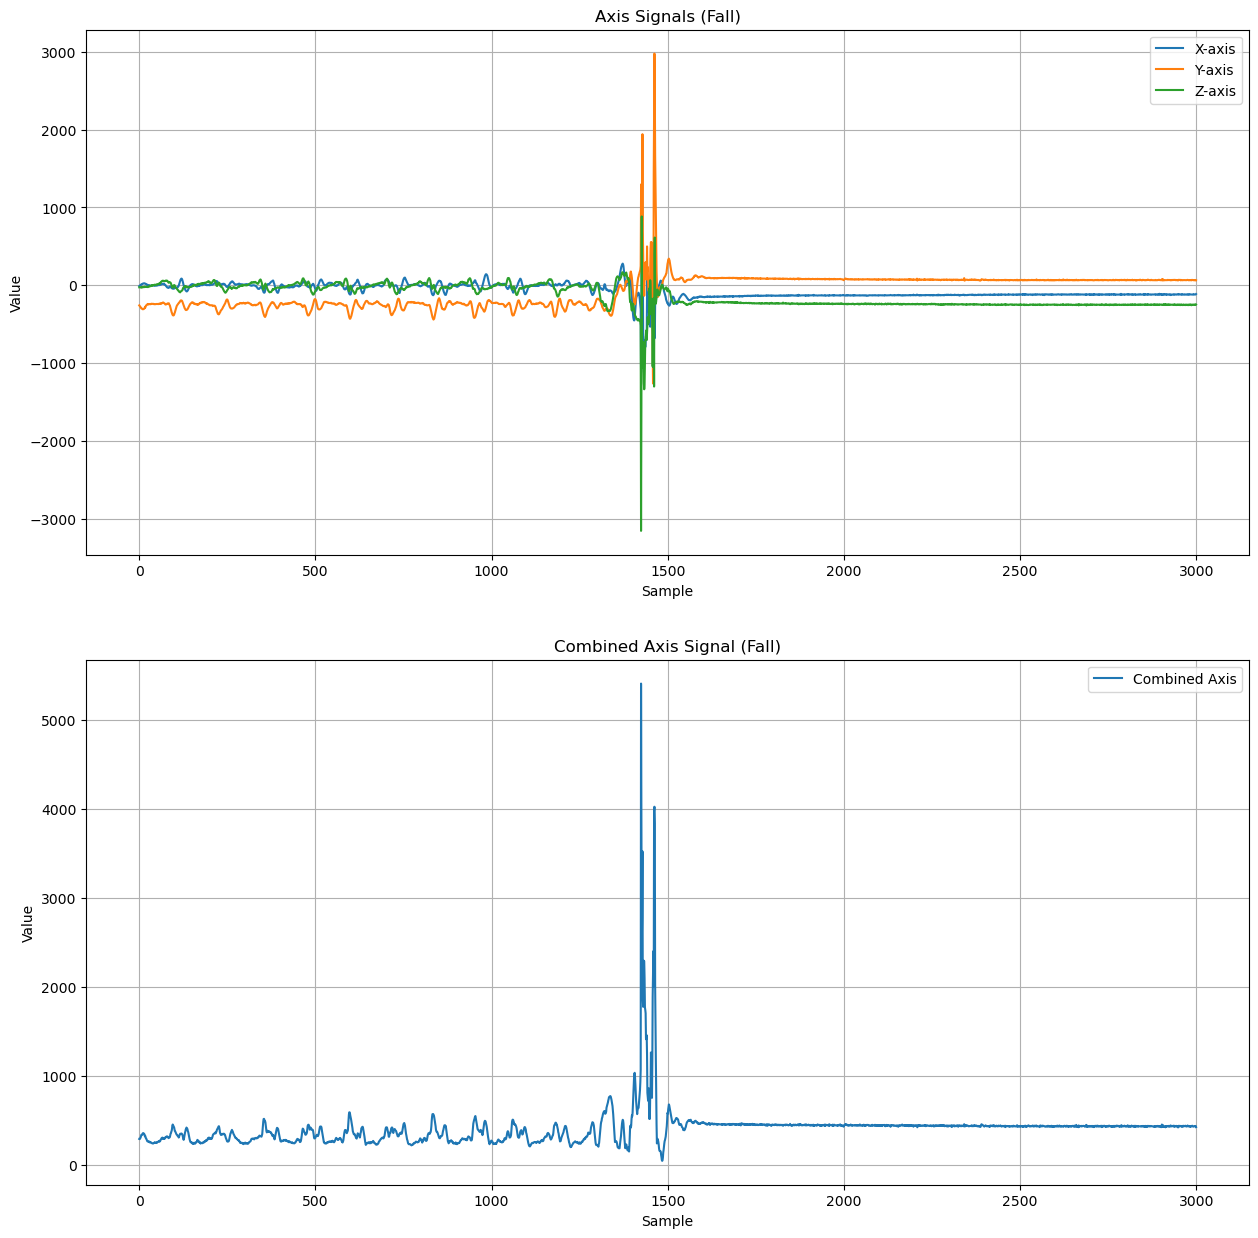

In [8]:
all_axis = np.abs(falls[0][0, :]) + np.abs(falls[0][1, :]) + np.abs(falls[0][2, :])
plt.figure(figsize=(15, 15))

plt.subplot(2, 1, 2)
plt.plot(all_axis, label='Combined Axis')
plt.title(f'Combined Axis Signal (Fall)')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.grid()
plt.legend()

plt.subplot(2, 1, 1)
plt.plot(falls[0][0, :], label='X-axis')
plt.plot(falls[0][1, :], label='Y-axis')
plt.plot(falls[0][2, :], label='Z-axis')
plt.title('Axis Signals (Fall)')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.grid()
plt.legend()

plt.show()

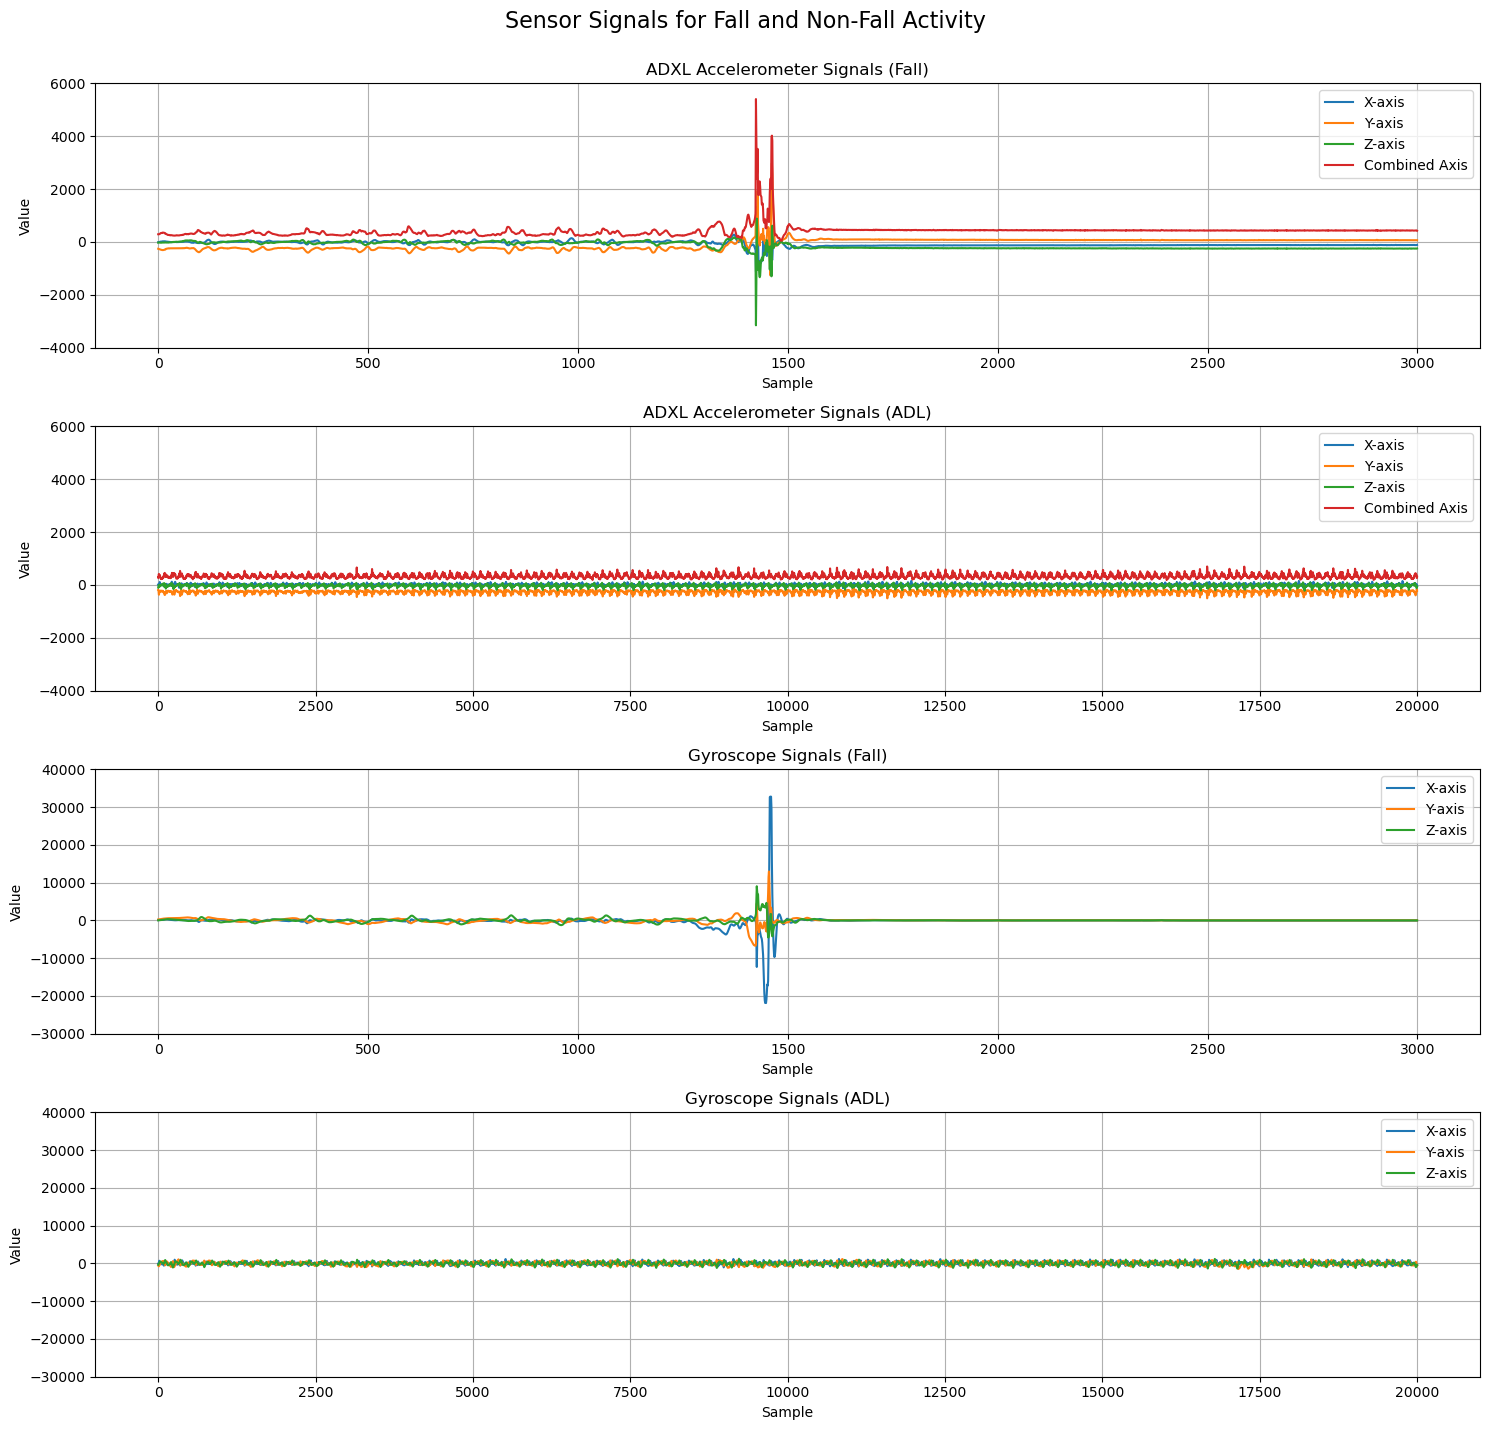

In [9]:
# compare plot of fall recording and adl recording

all_axis_fall = np.abs(falls[0][0, :]) + np.abs(falls[0][1, :]) + np.abs(falls[0][2, :])
all_axis_adl = np.abs(adls[0][0, :]) + np.abs(adls[0][1, :]) + np.abs(adls[0][2, :])

plt.figure(figsize=(15, 15))

# Plot the first 3 signals together
plt.subplot(4, 1, 1)
plt.plot(falls[0][0, :], label='X-axis')
plt.plot(falls[0][1, :], label='Y-axis')
plt.plot(falls[0][2, :], label='Z-axis')
plt.plot(all_axis_fall, label='Combined Axis', linestyle='-')
plt.title('ADXL Accelerometer Signals (Fall)')
plt.ylim(-4000, 6000)
plt.xlabel('Sample')
plt.ylabel('Value')
plt.legend()
plt.grid()

plt.subplot(4, 1, 2)
plt.plot(adls[0][0, :], label='X-axis')
plt.plot(adls[0][1, :], label='Y-axis')
plt.plot(adls[0][2, :], label='Z-axis')
plt.plot(all_axis_adl, label='Combined Axis', linestyle='-')
plt.title('ADXL Accelerometer Signals (ADL)')
plt.ylim(-4000, 6000)
plt.xlabel('Sample')
plt.ylabel('Value')
plt.legend()
plt.grid()

# Plot the last 3 signals and adding together
plt.subplot(4, 1, 3)
plt.plot(falls[0][3, :], label='X-axis')
plt.plot(falls[0][4, :], label='Y-axis')
plt.plot(falls[0][5, :], label='Z-axis')
plt.title('Gyroscope Signals (Fall)')
plt.ylim(-30000, 40000)
plt.xlabel('Sample')
plt.ylabel('Value')
plt.legend()
plt.grid()

plt.subplot(4, 1, 4)
plt.plot(adls[0][3, :], label='X-axis')
plt.plot(adls[0][4, :], label='Y-axis')
plt.plot(adls[0][5, :], label='Z-axis')
plt.title('Gyroscope Signals (ADL)')
plt.ylim(-30000, 40000)
plt.xlabel('Sample')
plt.ylabel('Value')
plt.legend()
plt.grid()


plt.suptitle('Sensor Signals for Fall and Non-Fall Activity', fontsize=16)
plt.tight_layout(rect = [0, 0.03, 1, 0.98])  # Adjust the title position
plt.show()

In [ ]:
all_data_filtered = []  # List to store filtered data
for i in range(len(all_data)):
    filtered_data = []
    for j in range(6):  # Assuming 6 signals (3 accelerometer + 3 gyroscope)
        filtered_signal = fn.lowpass_filter(all_data[i][j, :], cutoff=5, fs=200, order=4)
        filtered_data.append(filtered_signal)
    all_data_filtered.append(np.array(filtered_data))

# for i in range(len(all_data)):
#     # Apply lowpass filter to each signal
#     for j in range(6):  # Assuming 6 signals (3 accelerometer + 3 gyroscope)
#         all_data[i][j, :] = lowpass_filter(all_data[i][j, :], cutoff=10, fs=100, order=4)



Number of filtered ADL signals: 2707
Number of filtered Fall signals: 1798


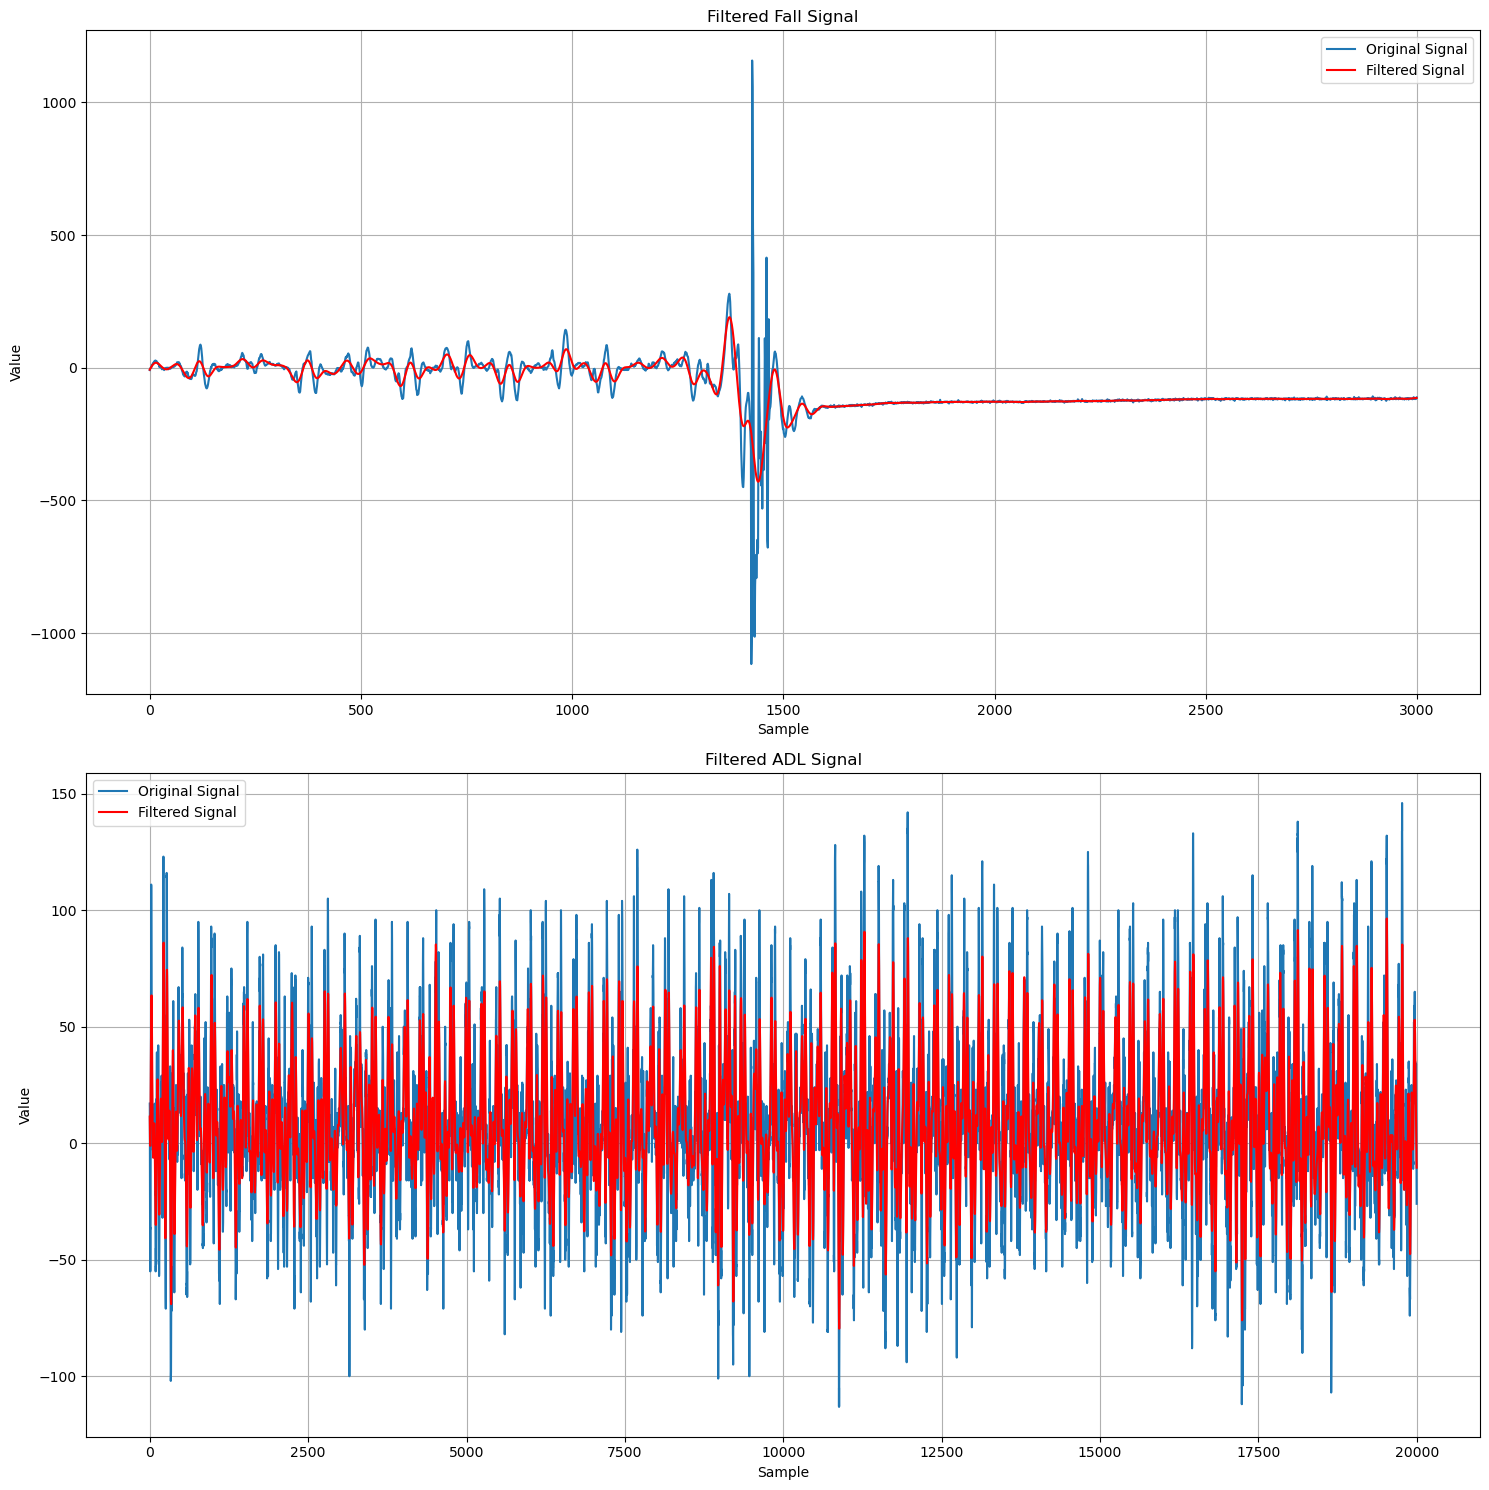

In [13]:
filtered_falls = []
filtered_adls = []
for i in range(len(all_labels)):
    if all_labels[i] == 'ADL':
        filtered_adls.append(all_data_filtered[i])
    elif all_labels[i] == 'Fall':
        filtered_falls.append(all_data_filtered[i])
print(f"Number of filtered ADL signals: {len(filtered_adls)}")
print(f"Number of filtered Fall signals: {len(filtered_falls)}")
# Plot the first filtered fall signal vs the original
plt.figure(figsize=(15, 15))
plt.subplot(2, 1, 1)
plt.plot(falls[0][0, :], label='Original Signal')
plt.plot(filtered_falls[0][0, :], label='Filtered Signal', color='red')
plt.title('Filtered Fall Signal')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.subplot(2, 1, 2)
plt.plot(adls[0][0, :], label='Original Signal')
plt.plot(filtered_adls[0][0, :], label='Filtered Signal', color='red')
plt.title('Filtered ADL Signal')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# feature functions

In [ ]:
data_array = all_data   

f1 = fn.sum_vector_magnitude(data_array, method='all')
f2 = fn.max_peak_to_peak_amp(data_array)
f3 = fn.standard_deviation_magnitude_h(data_array)
f4 = fn.standard_deviation_magnitude(data_array)



Number of features extracted (f1): 4505
Number of features extracted (f2): 4505
Number of features extracted (f3): 4505
Number of features extracted (f4): 4505


In [16]:
# check type and length of output data

print(type(f1), len(f1), len(f1[4]))  # Use len(f1) since f1 is a list of arrays
print(type(f2), len(f2), len(f2[0]))  # Use np.shape(f2) since f2 is a list of arrays
print(type(f3), len(f3), len(f3[0]))  # Use np.shape(f3) since f3 is a list of arrays
print(type(f4), len(f4), len(f4[0]))  # Use np.shape(f4) since f4 is a list of arrays


<class 'list'> 4505 5000
<class 'list'> 4505 798
<class 'list'> 4505 798
<class 'list'> 4505 798


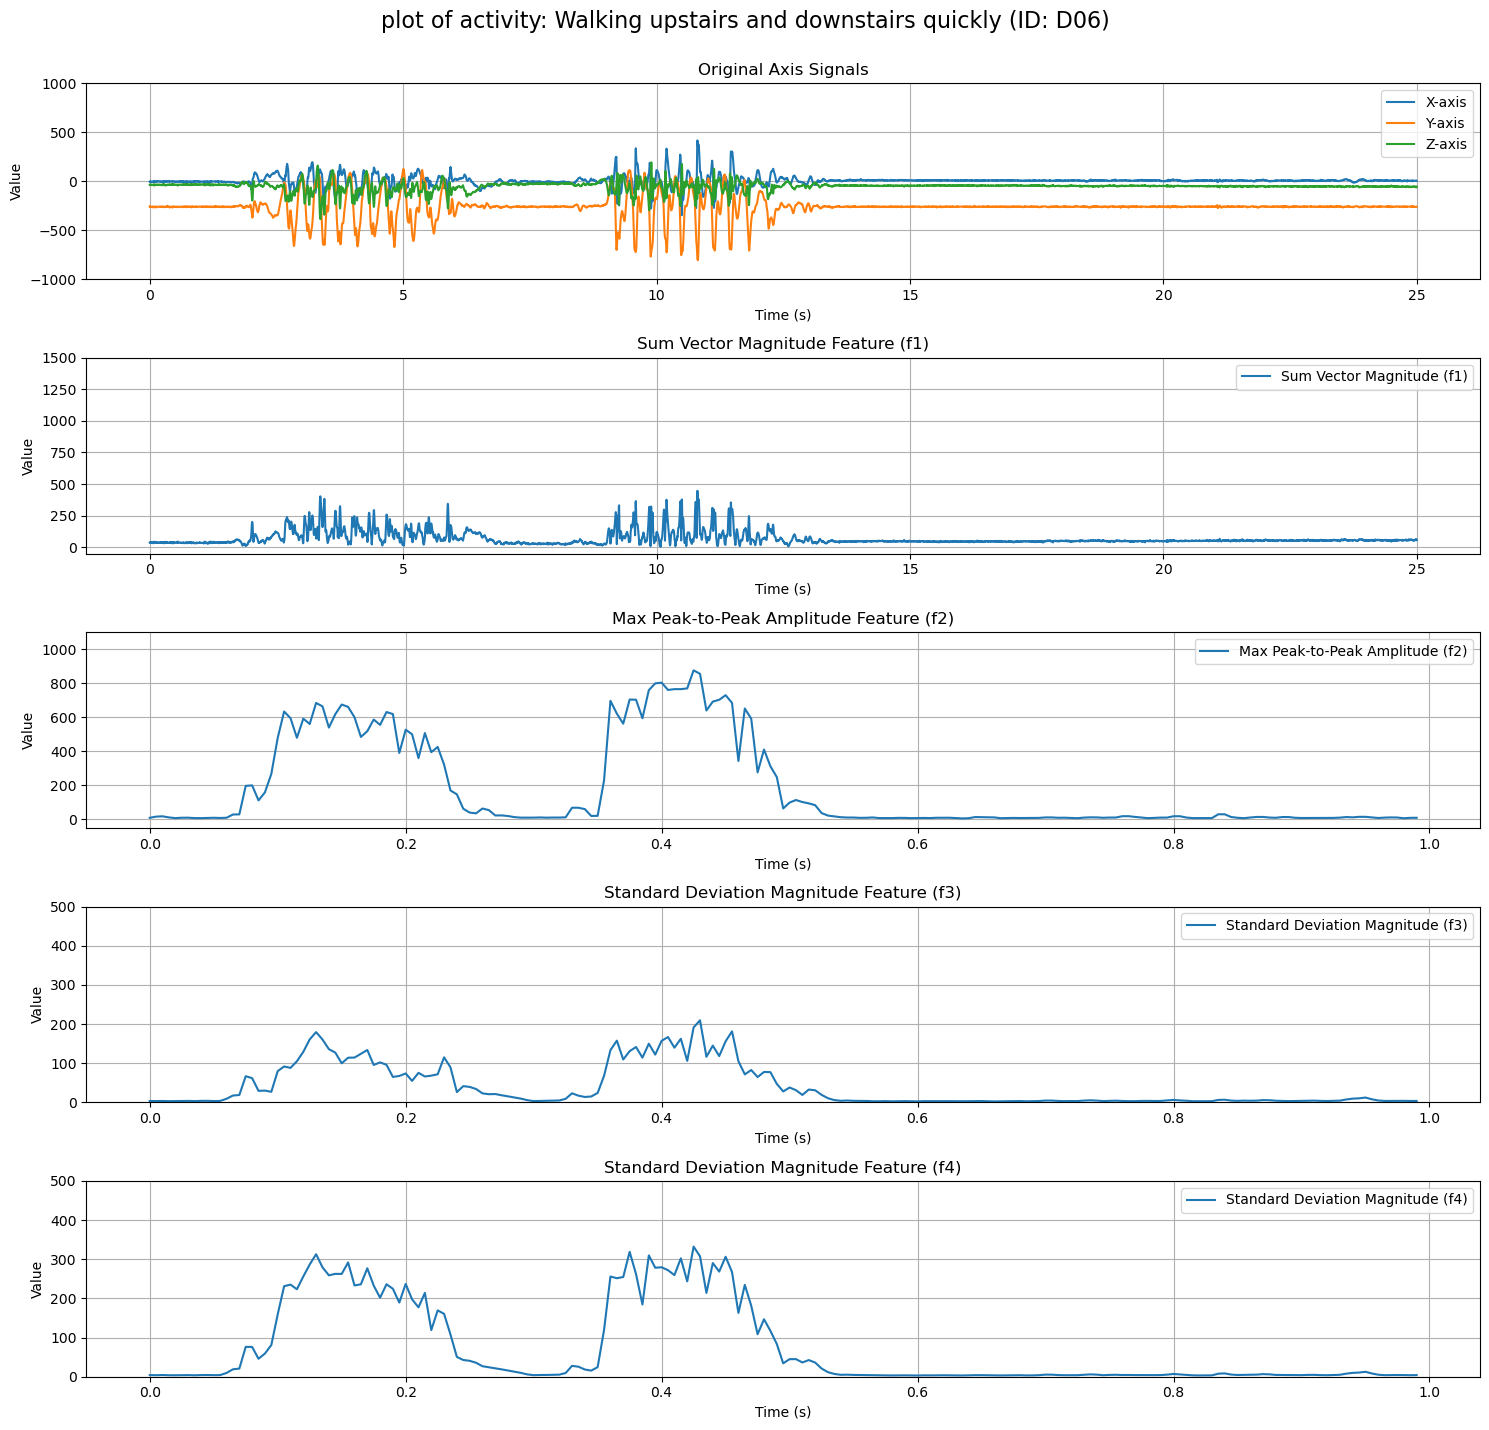

In [17]:
sample_num = 10

plt.figure(figsize=(15, 15))
time = np.arange(0, len(all_data[sample_num][0, :])) / 200  # Assuming a sampling rate of 200 Hz
# Plot the Original Signal
plt.subplot(5, 1, 1)
plt.plot(time, all_data[sample_num][0, :], label='X-axis')
plt.plot(time, all_data[sample_num][1, :], label='Y-axis')
plt.plot(time, all_data[sample_num][2, :], label='Z-axis')
plt.ylim(-1000, 1000)
plt.title(f'Original Axis Signals')
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.legend()
plt.grid()

# Plot the Sum Vector Magnitude (f1)
plt.subplot(5, 1, 2)
plt.plot(time[:len(f1[sample_num])], f1[sample_num], label='Sum Vector Magnitude (f1)')
plt.ylim(-50, 1500)
plt.title(f'Sum Vector Magnitude Feature (f1)')
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.legend()
plt.grid()

# Plot the Max Peak-to-Peak Amplitude (f2)
plt.subplot(5, 1, 3)
plt.plot(time[:len(f2[sample_num])], f2[sample_num], label='Max Peak-to-Peak Amplitude (f2)')
plt.ylim(-50, 1100)
plt.title(f'Max Peak-to-Peak Amplitude Feature (f2)')
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.legend()
plt.grid()

# Plot the Standard Deviation Magnitude on Horizontal Plane (f3)
plt.subplot(5, 1, 4)
plt.plot(time[:len(f3[sample_num])], f3[sample_num], label='Standard Deviation Magnitude (f3)')
plt.ylim(0, 500)
plt.title(f'Standard Deviation Magnitude Feature (f3)')
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.legend()
plt.grid()

# Plot the Standard Deviation Magnitude (f4)
plt.subplot(5, 1, 5)
plt.plot(time[:len(f4[sample_num])], f4[sample_num], label='Standard Deviation Magnitude (f4)')
plt.ylim(0, 500)
plt.title(f'Standard Deviation Magnitude Feature (f4)')
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.legend()
plt.grid()

plt.suptitle(
    f"plot of activity: {activity_mapping[activity_code_list[sample_num]]} "
    f"(ID: {activity_code_list[sample_num]})", fontsize=16
)
plt.tight_layout(rect = [0, 0.03, 1, 0.98])
plt.show()



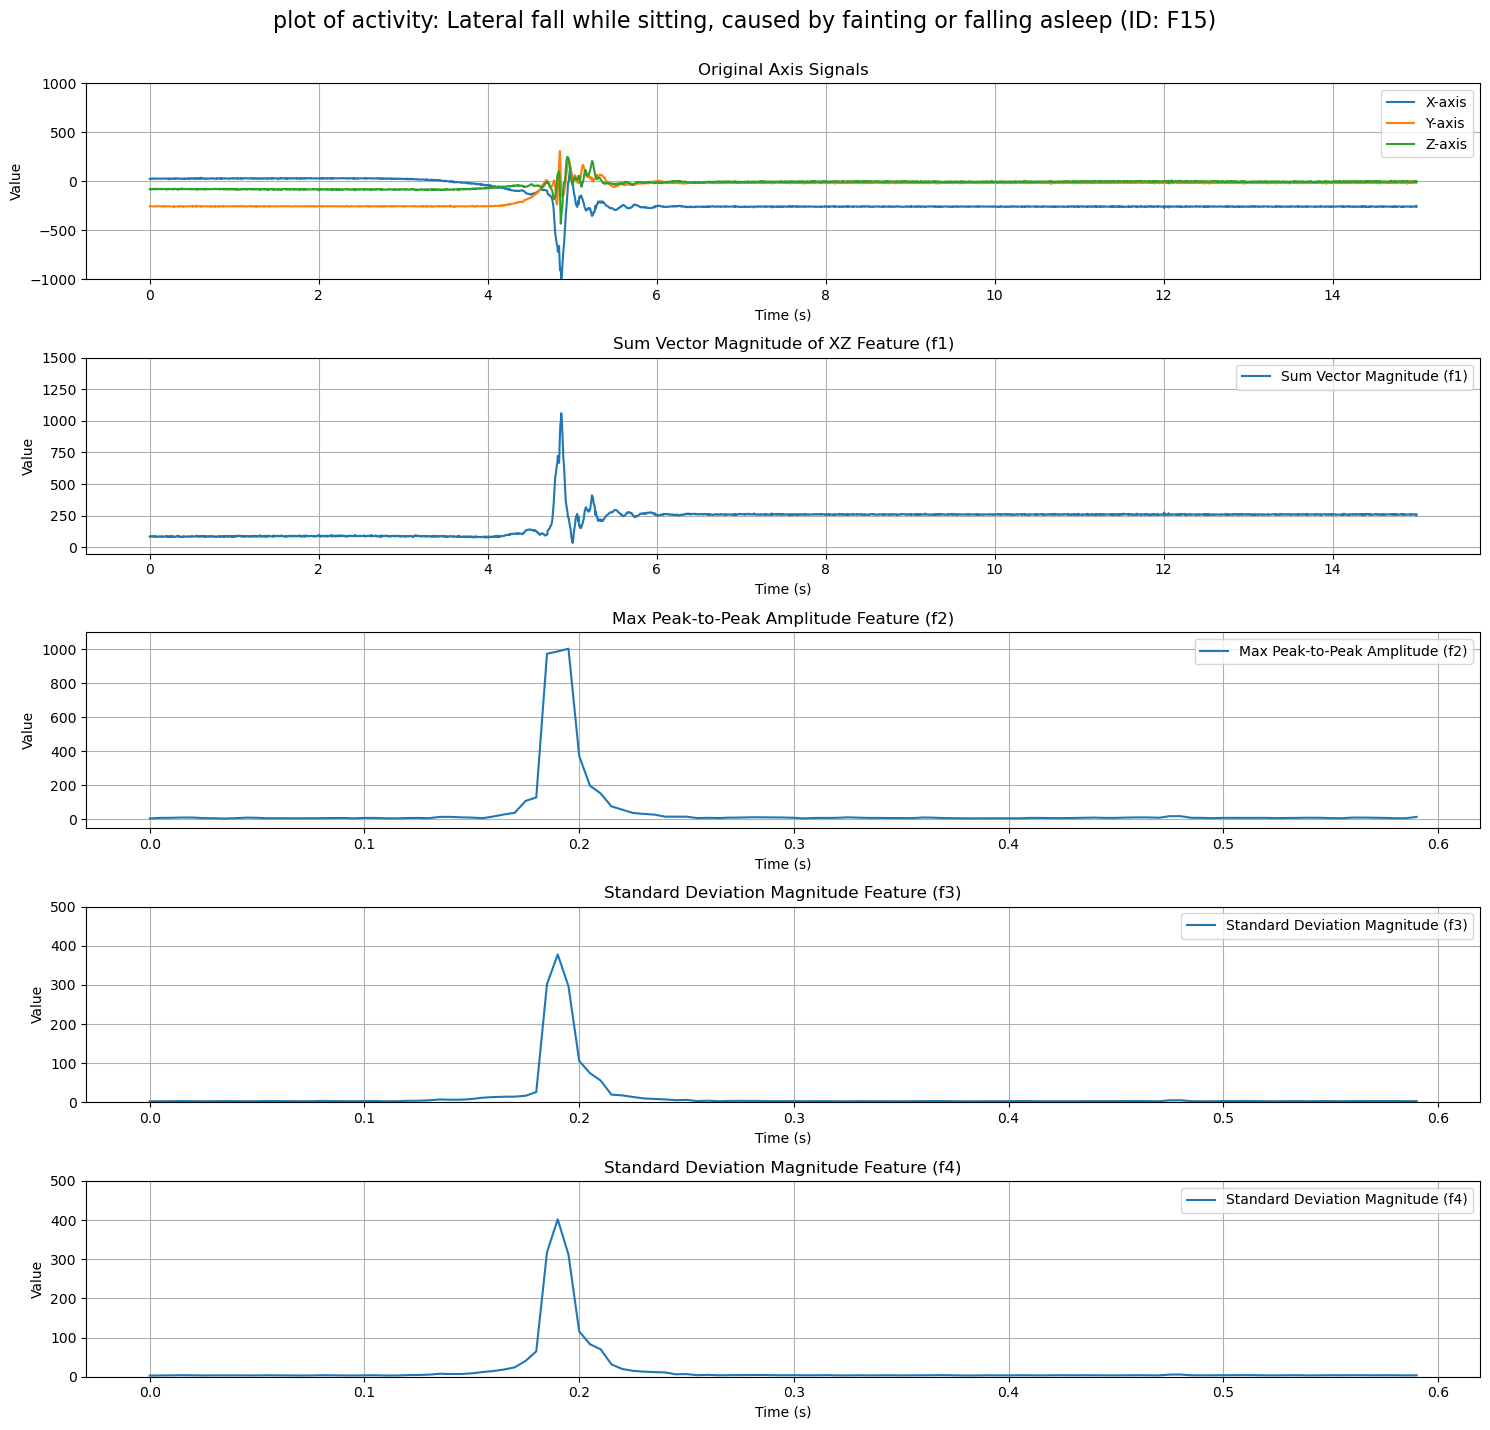

In [18]:
sample_num = 1000

plt.figure(figsize=(15, 15))
time = np.arange(0, len(all_data[sample_num][0, :])) / 200  # Assuming a sampling rate of 200 Hz
# Plot the Original Signal
plt.subplot(5, 1, 1)
plt.plot(time, all_data[sample_num][0, :], label='X-axis')
plt.plot(time, all_data[sample_num][1, :], label='Y-axis')
plt.plot(time, all_data[sample_num][2, :], label='Z-axis')
plt.ylim(-1000, 1000)
plt.title(f'Original Axis Signals')
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.legend()
plt.grid()

# Plot the Sum Vector Magnitude (f1)
plt.subplot(5, 1, 2)
plt.plot(time[:len(f1[sample_num])], f1[sample_num], label='Sum Vector Magnitude (f1)')
plt.ylim(-50, 1500)
plt.title(f'Sum Vector Magnitude of XZ Feature (f1)')
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.legend()
plt.grid()

# Plot the Max Peak-to-Peak Amplitude (f2)
plt.subplot(5, 1, 3)
plt.plot(time[:len(f2[sample_num])], f2[sample_num], label='Max Peak-to-Peak Amplitude (f2)')
plt.ylim(-50, 1100)
plt.title(f'Max Peak-to-Peak Amplitude Feature (f2)')
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.legend()
plt.grid()

# Plot the Standard Deviation Magnitude on Horizontal Plane (f3)
plt.subplot(5, 1, 4)
plt.plot(time[:len(f3[sample_num])], f3[sample_num], label='Standard Deviation Magnitude (f3)')
plt.ylim(0, 500)
plt.title(f'Standard Deviation Magnitude Feature (f3)')
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.legend()
plt.grid()

# Plot the Standard Deviation Magnitude (f4)
plt.subplot(5, 1, 5)
plt.plot(time[:len(f4[sample_num])], f4[sample_num], label='Standard Deviation Magnitude (f4)')
plt.ylim(0, 500)
plt.title(f'Standard Deviation Magnitude Feature (f4)')
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.legend()
plt.grid()

plt.suptitle(
    f"plot of activity: {activity_mapping[activity_code_list[sample_num]]} "
    f"(ID: {activity_code_list[sample_num]})", fontsize=16
)
plt.tight_layout(rect = [0, 0.03, 1, 0.98])
plt.show()

In [20]:
sample_number = 1000  # Index of the sample you want to analyze
signal = all_data[sample_number][0:3,:]  # Example signal
print(signal.shape)

(3, 3000)


Start index of fall window: 959
End index of fall window: 1059


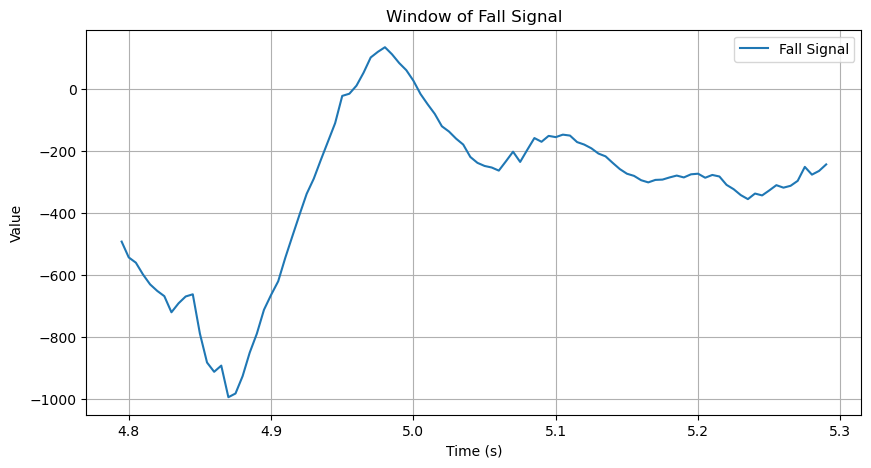

In [ ]:
start, end = fn.find_fall_window(signal)
print(f"Start index of fall window: {start}")
print(f"End index of fall window: {end}")
fn.plot_fall_window(signal, start, end)

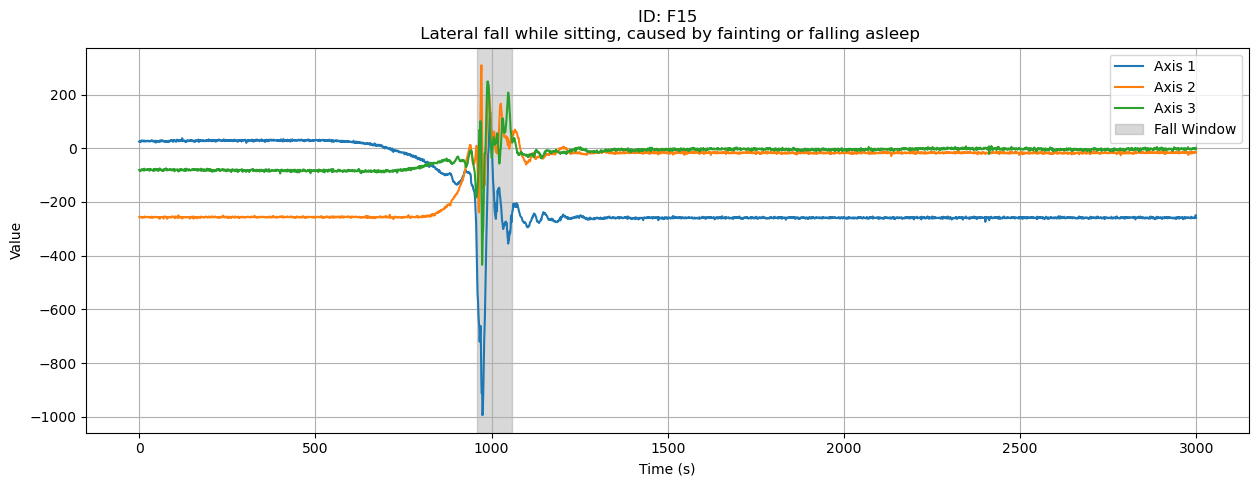

In [22]:
# plot the fall window with the signal
time = np.arange(0, len(signal)) / 200  # Assuming a sampling rate of 200 Hz

plt.figure(figsize=(15, 5))
for i in range(3):
    plt.plot( signal[i,:], label=f'Axis {i+1}')
plt.axvspan(start, end, color='gray', alpha=0.3, label='Fall Window')
plt.title(
    f"ID: {activity_code_list[sample_number]}\n "
    f"{activity_mapping[activity_code_list[sample_number]]}")
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

In [23]:
# calculate and plot the fall window for n samples
sample_numbers = np.random.randint(1, 4505, size=10)
print(sample_numbers)

[ 929  651  668  754 2388 1822  142 2455 1108  631]


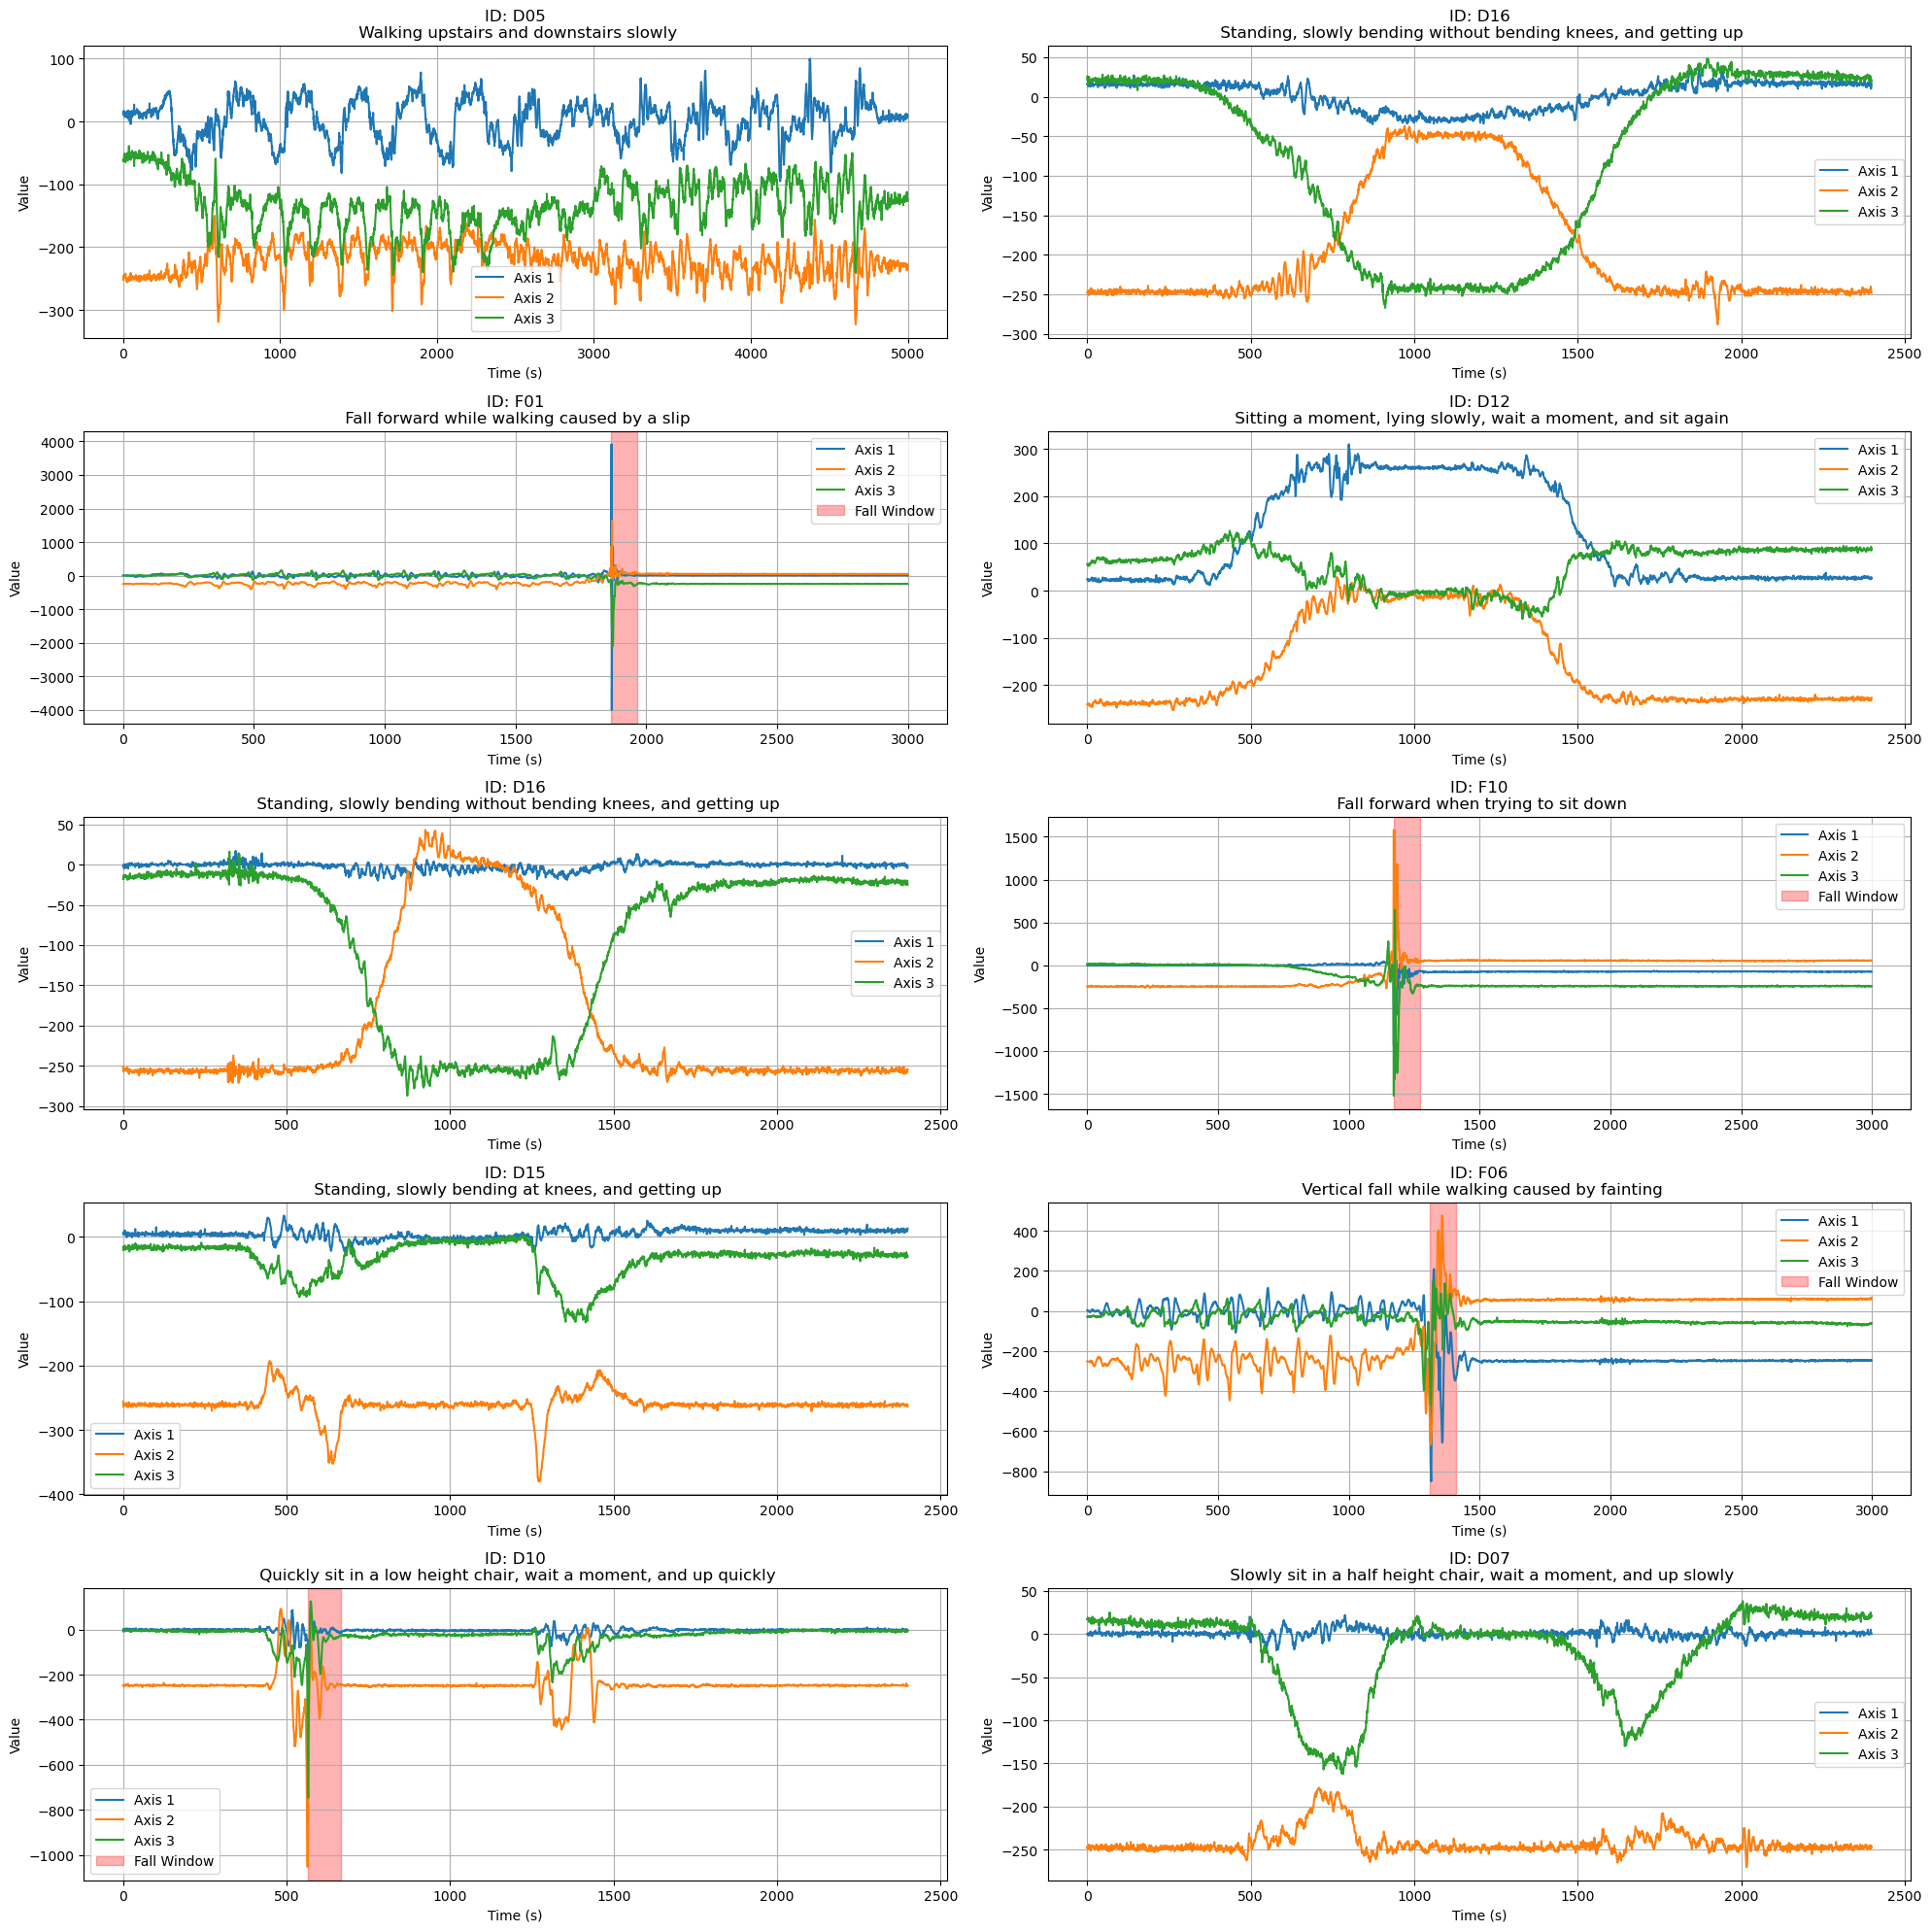

In [ ]:

plt.figure(figsize=(20, 20))
for i, sample_number in enumerate(sample_numbers):
    signal = all_data[sample_number][0:3, :]  # Example signal
    start, end = fn.find_fall_window(signal, threshold=650)
    
    plt.subplot(5, 2, i + 1)
    for j in range(3):
        plt.plot(signal[j, :], label=f'Axis {j+1}')
    if start is not None and end is not None:
        plt.axvspan(start, end, color='red', alpha=0.3, label='Fall Window')
    plt.title(
        f"ID: {activity_code_list[sample_number]}\n "
        f"{activity_mapping[activity_code_list[sample_number]]}")
    plt.xlabel('Time (s)')
    plt.ylabel('Value')
    plt.legend()
    plt.grid()
plt.tight_layout()
plt.show()

## find maximum number of each fall

in order to set threshold, we should find minimum "max number" in fall signals. 

In [ ]:
fall_f1 = fn.sum_vector_magnitude(falls, method='all')

Number of features extracted (f1): 1798


In [26]:
list_of_maxs = []
list_of_xyz_maxs = []
list_of_xz_maxs = []
f1_max_list = []

for fall in falls:
    list_of_maxs.append(np.max(fall[0:3, :], axis=1))
    list_of_xz_maxs.append(np.max(np.abs(fall[0, :]) + np.abs(fall[2, :])))
    list_of_xyz_maxs.append(np.max(np.abs(fall[0, :]) + np.abs(fall[1, :]) + np.abs(fall[2, :])))
    f1_max_list.append(np.max(fall_f1[i]))


In [27]:
len(list_of_maxs), len(list_of_xz_maxs), len(list_of_xyz_maxs), len(f1_max_list)

(1798, 1798, 1798, 1798)

In [28]:
np.shape(list_of_maxs), len(list_of_maxs), len(list_of_xz_maxs), len(list_of_xyz_maxs),

((1798, 3), 1798, 1798, 1798)

In [29]:
# print minimum number in f1_max_list
min_value_f1 = np.min(f1_max_list)
min_index_f1 = f1_max_list.index(min_value_f1)
print(f"Minimum value in f1_max_list: {min_value_f1} at index {min_index_f1}")

min_value_xz = np.min(list_of_xz_maxs)
min_index_xz = list_of_xz_maxs.index(min_value_xz)
print(f"Minimum value in list_of_xz_maxs: {min_value_xz} at index {min_index_xz}")

min_value_xyz = np.min(list_of_xyz_maxs)
min_index_xyz = list_of_xyz_maxs.index(min_value_xyz)
print(f"Minimum value in list_of_xyz_maxs: {min_value_xyz} at index {min_index_xyz}")


Minimum value in f1_max_list: 1533.4239465979394 at index 0
Minimum value in list_of_xz_maxs: 343 at index 1775
Minimum value in list_of_xyz_maxs: 618 at index 661


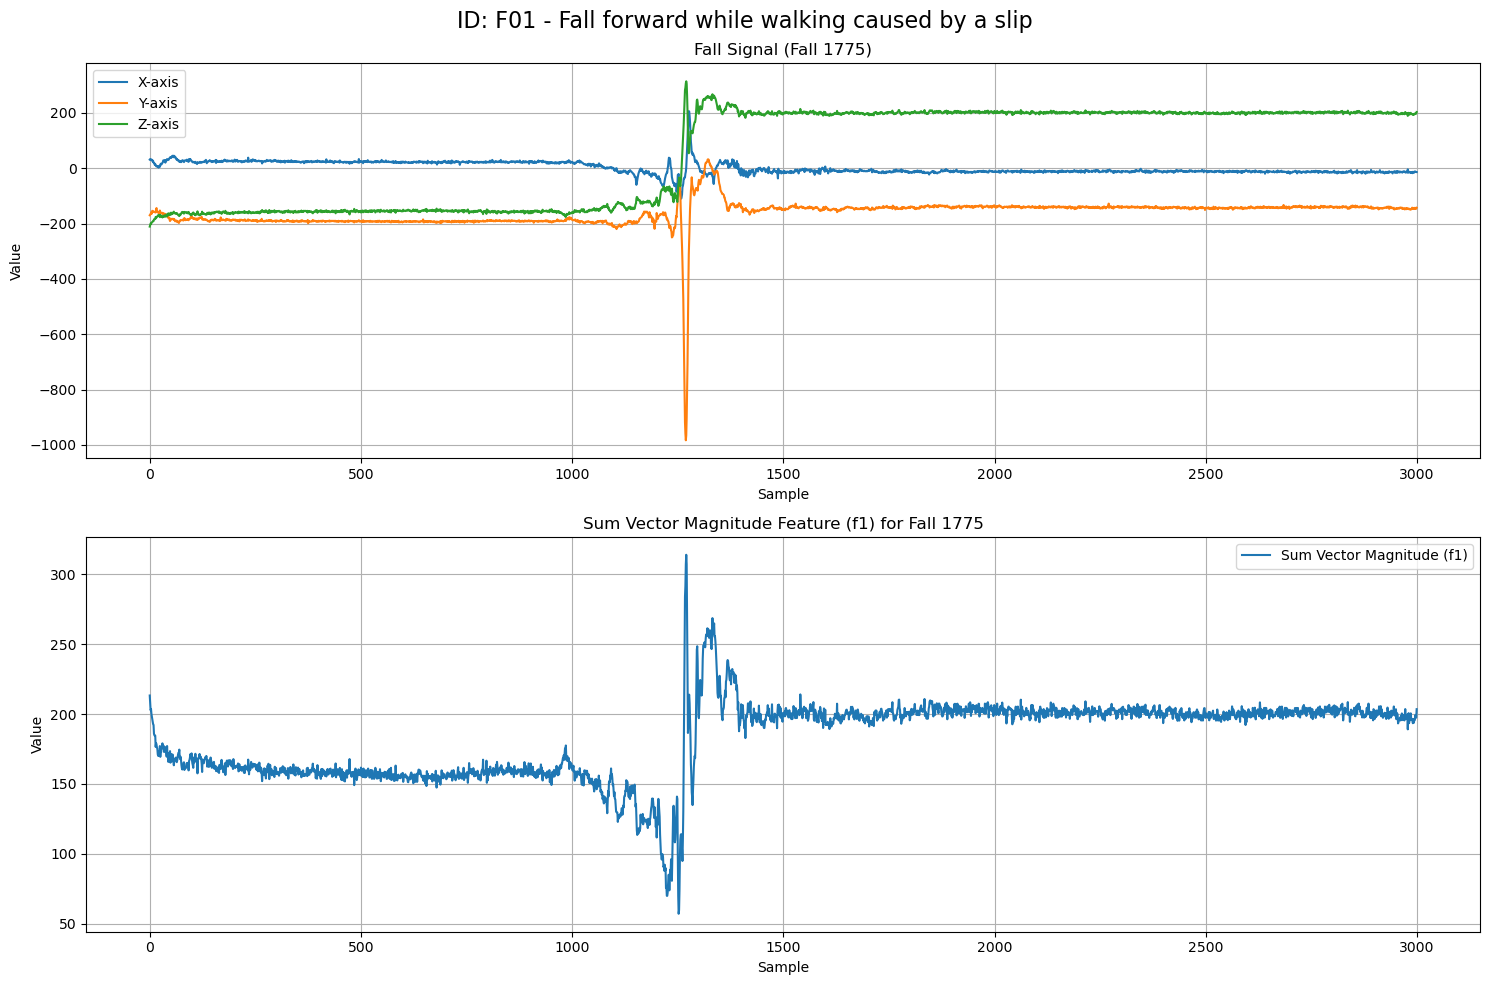

In [30]:
#plot fall[33]

kk = min_index_xz

plt.figure(figsize=(15, 10))

# Plot the original signal
plt.subplot(2, 1, 1)
plt.plot(falls[kk][0, :], label='X-axis')
plt.plot(falls[kk][1, :], label='Y-axis')
plt.plot(falls[kk][2, :], label='Z-axis')
plt.title(f'Fall Signal (Fall {kk})')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.legend()
plt.grid()

# Plot the sum vector magnitude (f1)
plt.subplot(2, 1, 2)
plt.plot(fall_f1[kk], label='Sum Vector Magnitude (f1)')
plt.title(f'Sum Vector Magnitude Feature (f1) for Fall {kk}')

plt.xlabel('Sample')
plt.ylabel('Value')
plt.legend()
plt.grid()

plt.suptitle(
    f"ID: {activity_code_list[kk]} - "
    f"{activity_mapping[activity_code_list[kk]]}", fontsize=16)
plt.tight_layout()
plt.show()

### make all data same shape by trimming longer signals to size of minimum signal

In [31]:
min_length = min(matrix.shape[1] for matrix in all_data)
print(f"Minimum length of all data matrices: {min_length}")

Minimum length of all data matrices: 1999


In [ ]:
trimmed_data = fn.data_equal_trim(all_data) 

In [34]:
shapes = [data.shape for data in trimmed_data]
print(f"Number of samples: {len(trimmed_data)}")
print(f"Shape of each sample: {shapes[:5]} ...")  # Display the shape of the first 5 samples

Number of samples: 4505
Shape of each sample: [(6, 1999), (6, 1999), (6, 1999), (6, 1999), (6, 1999)] ...


In [35]:
trimmed_data = np.array(trimmed_data)
print(f"Shape of the new data: {trimmed_data.shape}")  # Shape should be (number_of_samples, 6, min_length)

Shape of the new data: (4505, 6, 1999)


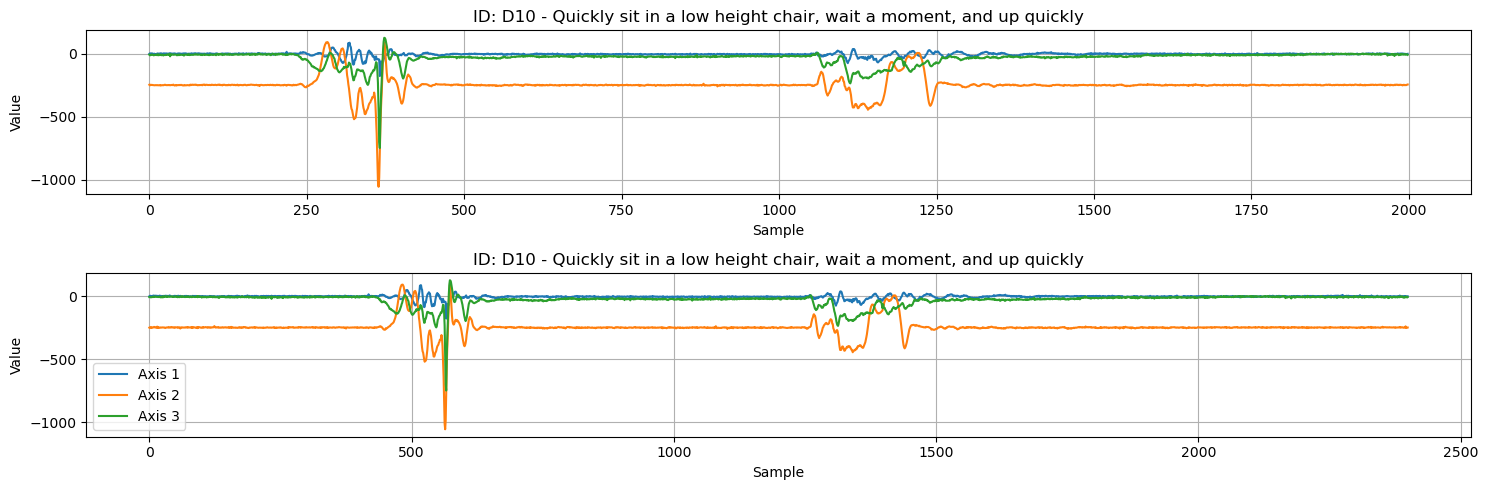

In [36]:
plt.figure(figsize=(15, 5))
plt.subplot(2, 1, 1)
for i in range(3):
    plt.plot(trimmed_data[sample_numbers[8]][i, :], label=f'Axis {i+1}')
plt.title(
    f"ID: {activity_code_list[sample_numbers[8]]} - "
    f"{activity_mapping[activity_code_list[sample_numbers[8]]]}")
plt.xlabel('Sample')
plt.ylabel('Value')
plt.grid()


plt.subplot(2, 1, 2)
for i in range(3):
    plt.plot(all_data[sample_numbers[8]][i, :], label=f'Axis {i+1}')
plt.title(
    f"ID: {activity_code_list[sample_numbers[8]]} - "
    f"{activity_mapping[activity_code_list[sample_numbers[8]]]}")
plt.xlabel('Sample')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()

In [ ]:


f1_trimmed_data = fn.sum_vector_magnitude(trimmed_data, method='all')
f2_trimmed_data = fn.max_peak_to_peak_amp(trimmed_data)
f3_trimmed_data = fn.standard_deviation_magnitude_h(trimmed_data)
f4_trimmed_data = fn.standard_deviation_magnitude(trimmed_data)

Number of features extracted (f1): 4505
Number of features extracted (f2): 4505
Number of features extracted (f3): 4505
Number of features extracted (f4): 4505


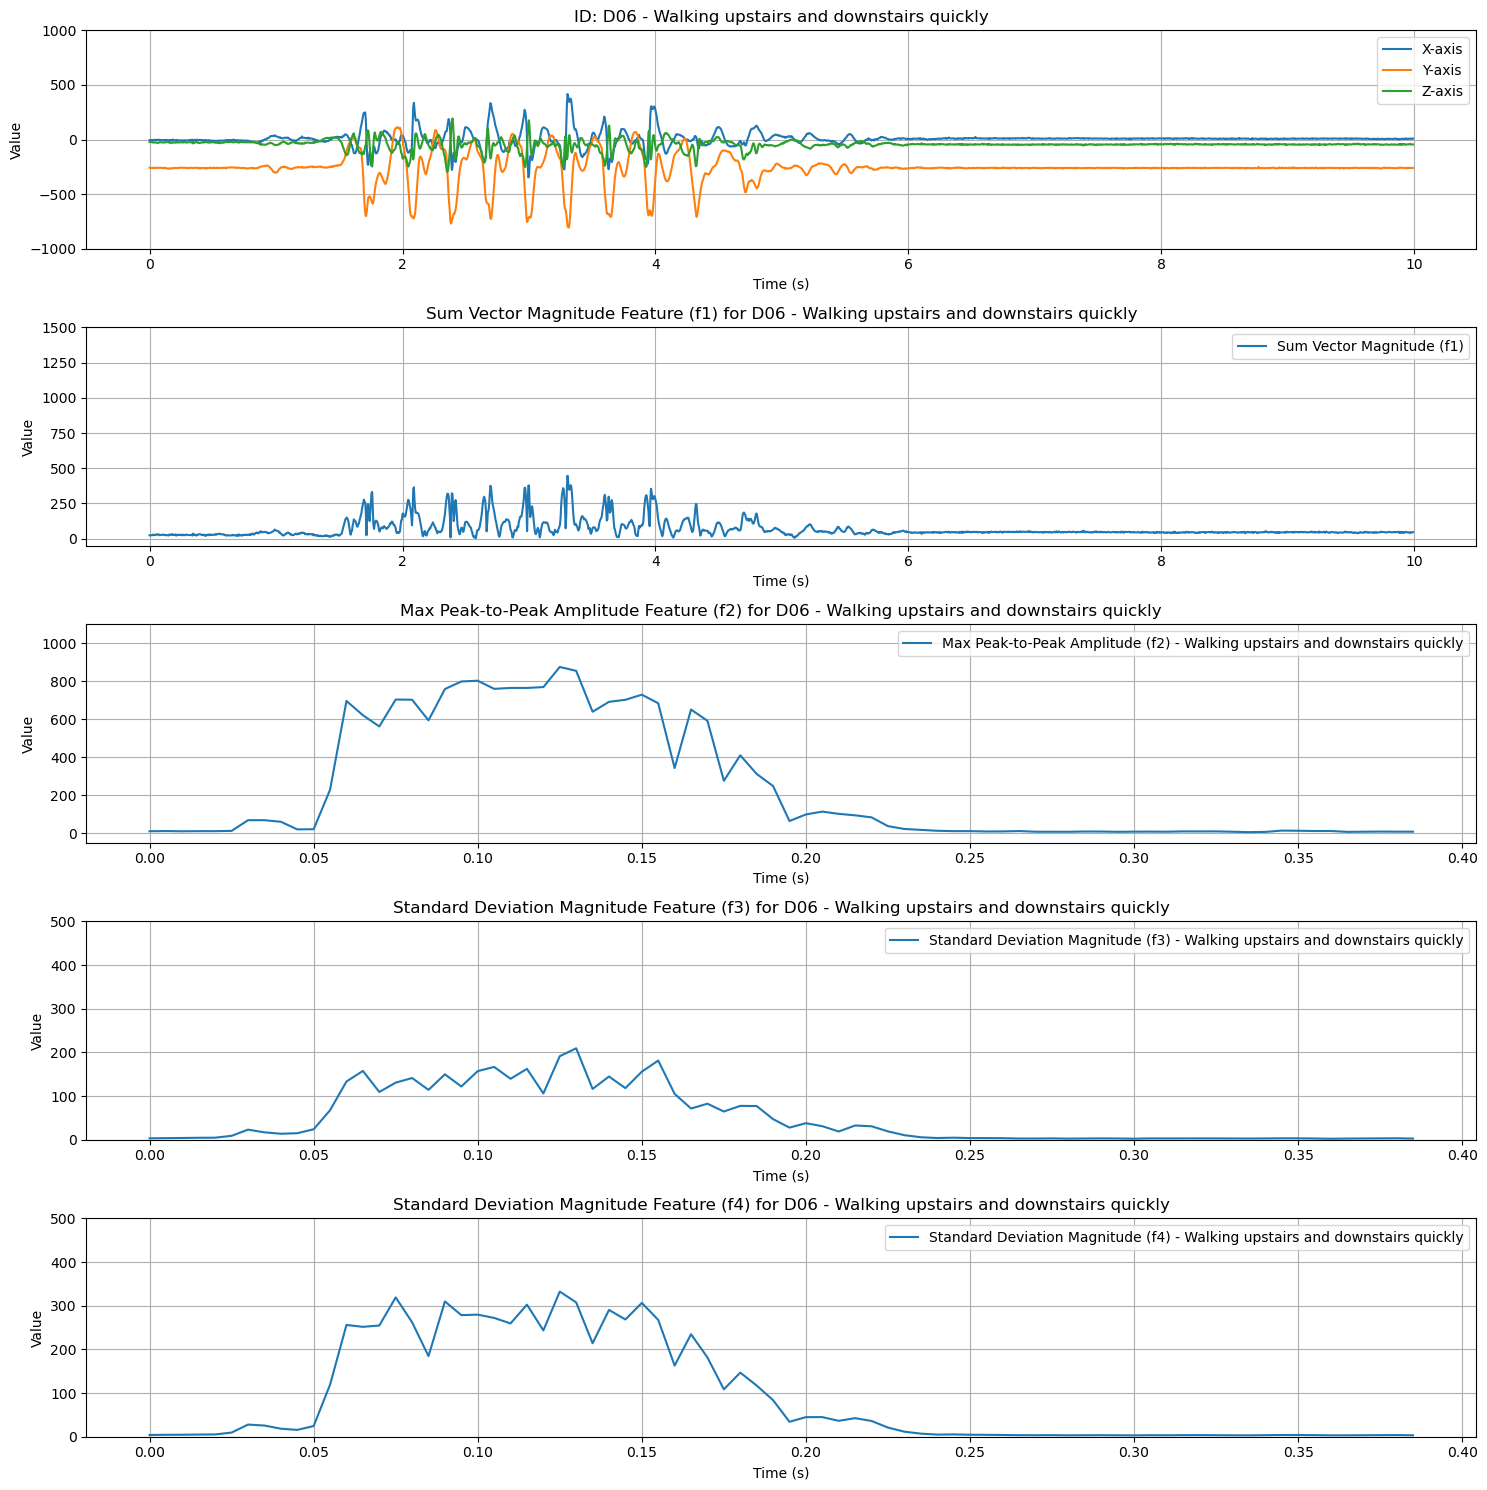

In [38]:
sample_num = 10

plt.figure(figsize=(15, 15))
time = np.arange(0, len(trimmed_data[sample_num][0, :])) / 200  # Assuming a sampling rate of 200 Hz
# Plot the Original Signal
plt.subplot(5, 1, 1)
plt.plot(time, trimmed_data[sample_num][0, :], label='X-axis')
plt.plot(time, trimmed_data[sample_num][1, :], label='Y-axis')
plt.plot(time, trimmed_data[sample_num][2, :], label='Z-axis')
plt.ylim(-1000, 1000)
plt.title(
    f"ID: {activity_code_list[sample_num]} - "
    f"{activity_mapping[activity_code_list[sample_num]]}")
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.legend()
plt.grid()

# Plot the Sum Vector Magnitude (f1)
plt.subplot(5, 1, 2)
plt.plot(time[:len(f1_trimmed_data[sample_num])], f1_trimmed_data[sample_num], label='Sum Vector Magnitude (f1)')
plt.ylim(-50, 1500)
plt.title(
    f'Sum Vector Magnitude Feature (f1) for {activity_code_list[sample_num]} - '
    f'{activity_mapping[activity_code_list[sample_num]]}')
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.legend()
plt.grid()

# Plot the Max Peak-to-Peak Amplitude (f2)
plt.subplot(5, 1, 3)
plt.plot(time[:len(f2_trimmed_data[sample_num])], f2_trimmed_data[sample_num], label='Max Peak-to-Peak Amplitude (f2) - '
    f'{activity_mapping[activity_code_list[sample_num]]}')
plt.ylim(-50, 1100)
plt.title(f'Max Peak-to-Peak Amplitude Feature (f2) for {activity_code_list[sample_num]} - {activity_mapping[activity_code_list[sample_num]]}')
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.legend()
plt.grid()

# Plot the Standard Deviation Magnitude on Horizontal Plane (f3)
plt.subplot(5, 1, 4)
plt.plot(time[:len(f3_trimmed_data[sample_num])], f3_trimmed_data[sample_num], label='Standard Deviation Magnitude (f3) - '
    f'{activity_mapping[activity_code_list[sample_num]]}')
plt.ylim(0, 500)
plt.title(f'Standard Deviation Magnitude Feature (f3) for {activity_code_list[sample_num]} - {activity_mapping[activity_code_list[sample_num]]}')
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.legend()
plt.grid()

# Plot the Standard Deviation Magnitude (f4)
plt.subplot(5, 1, 5)
plt.plot(time[:len(f4_trimmed_data[sample_num])], f4_trimmed_data[sample_num], label='Standard Deviation Magnitude (f4) - '
    f'{activity_mapping[activity_code_list[sample_num]]}')
plt.ylim(0, 500)
plt.title(f'Standard Deviation Magnitude Feature (f4) for {activity_code_list[sample_num]} - {activity_mapping[activity_code_list[sample_num]]}')
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [39]:
# plot random 20 samples
sample_numbers = np.random.randint(1, 4505, size=20)

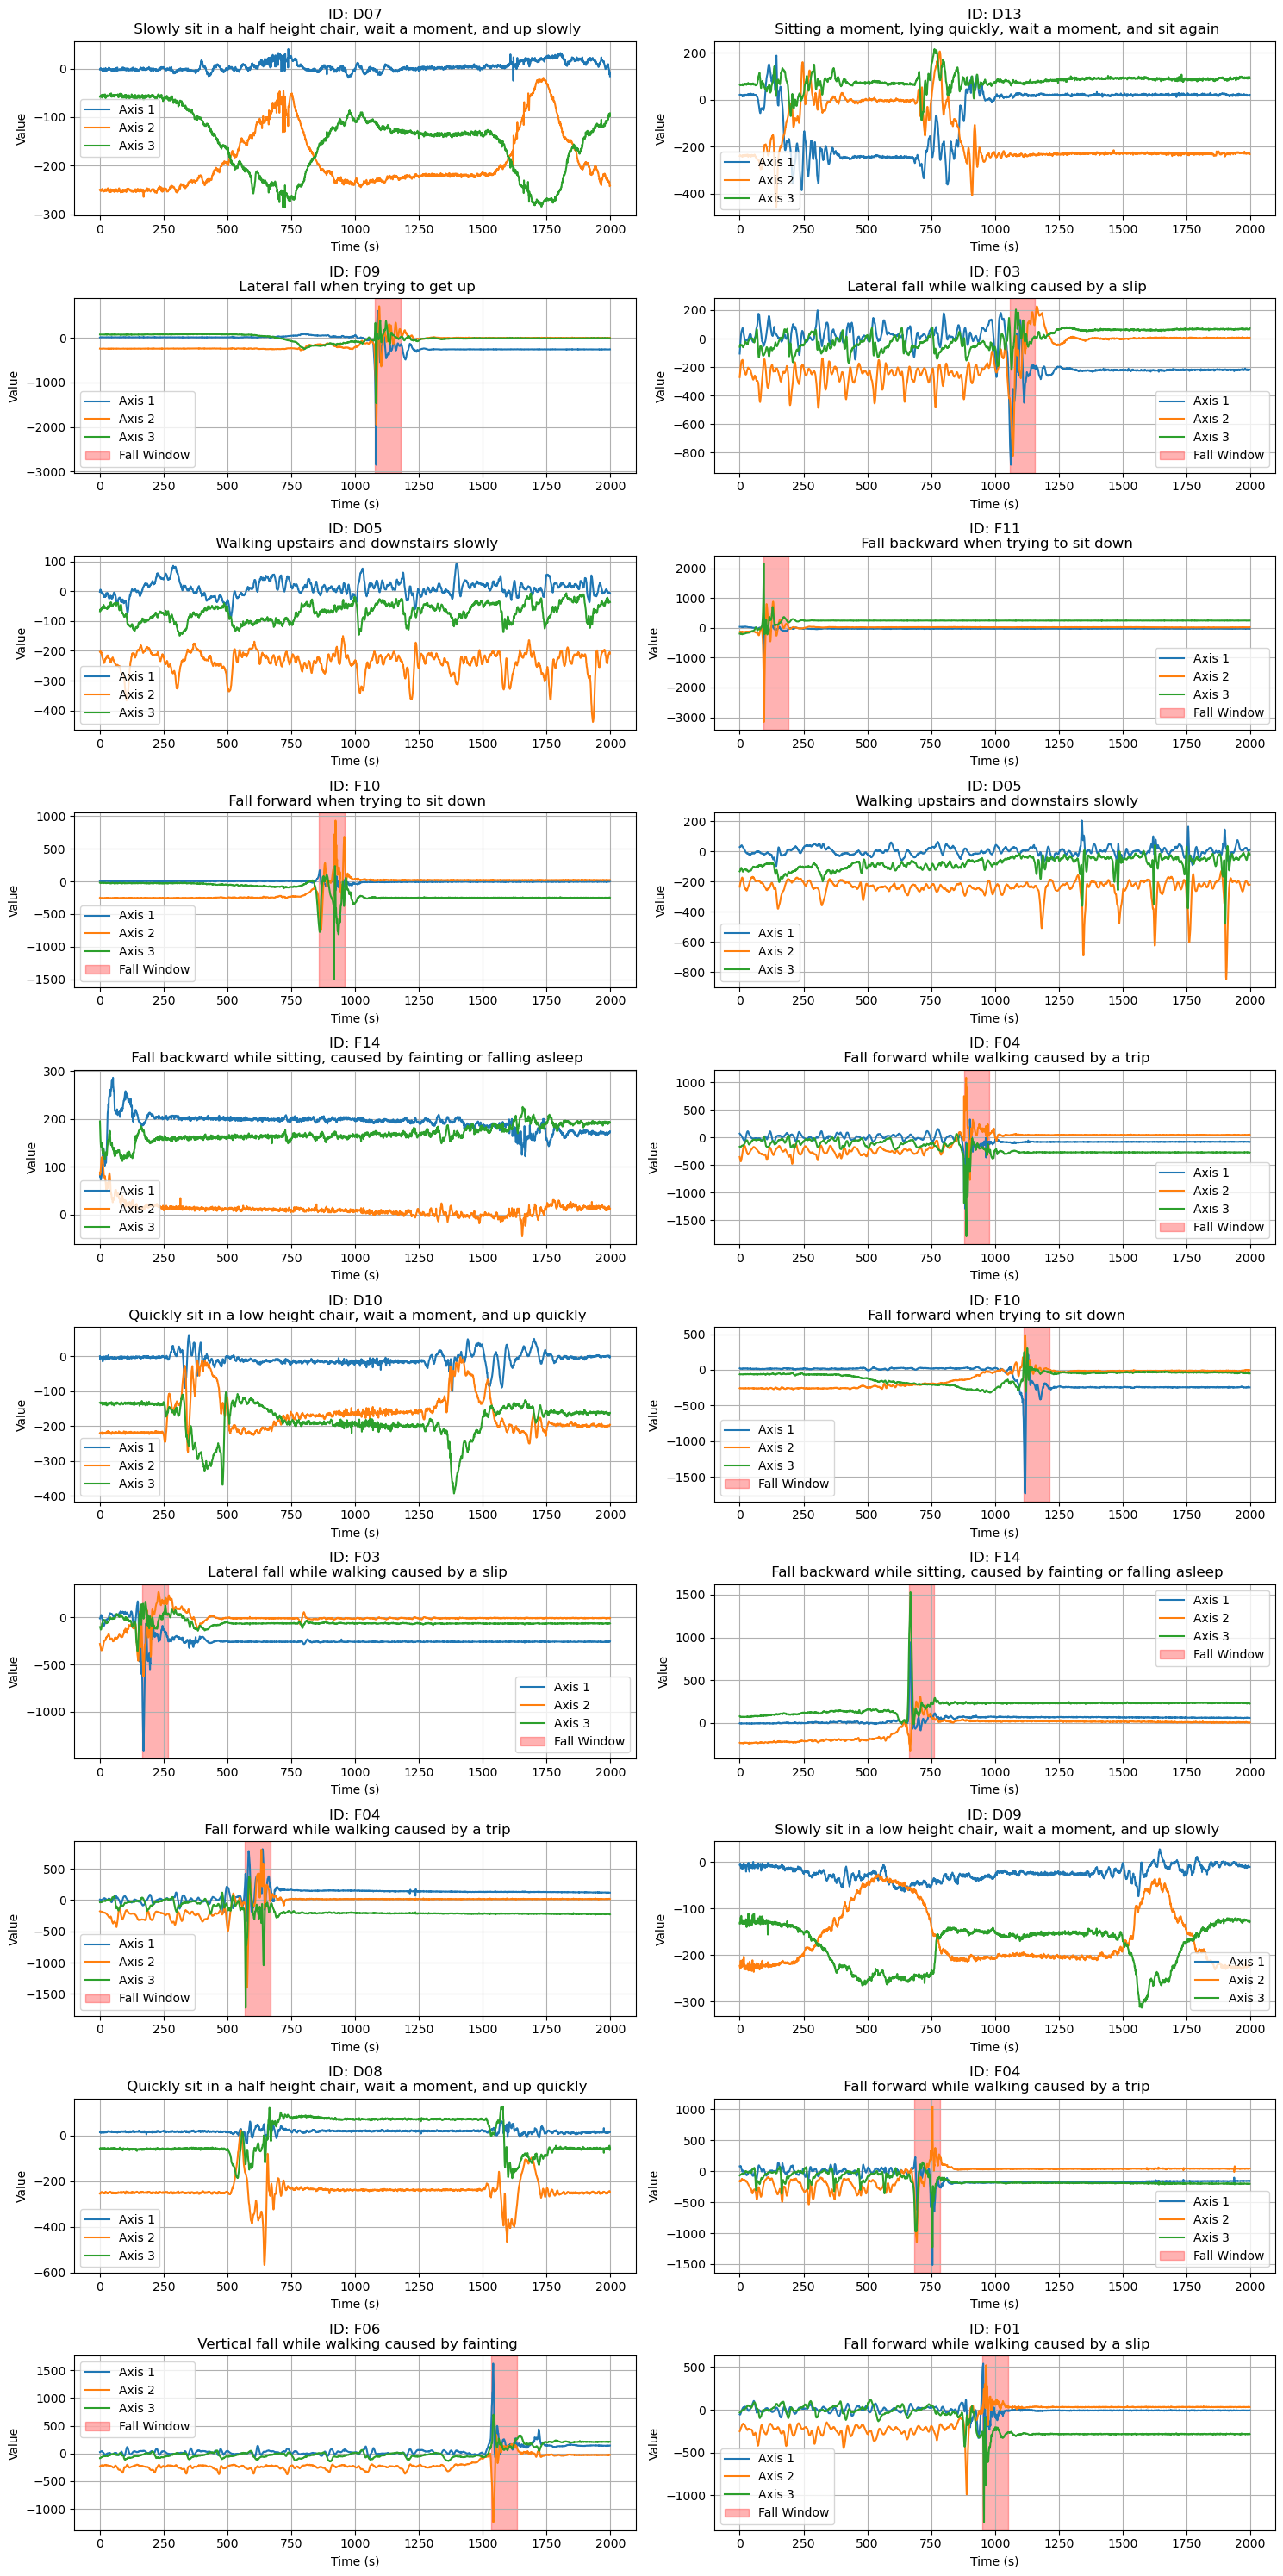

In [ ]:

plt.figure(figsize=(15, 30))
for i, sample_number in enumerate(sample_numbers):
    signal = trimmed_data[sample_number][0:3,:]  # Example signal
    start, end = fn.find_fall_window(signal, threshold=700)
    
    # plt.subplot(20, 1, i+1)
    # for j in range(3):
    #     plt.plot(signal[j,:], label=f'Axis {j+1}')
    # plt.axvspan(start, end, color='red', alpha=0.5, label='Fall Window')
    # plt.ylim(-1100, 1100)
    # plt.title(f'Original Axis Signals for {activity_code_list[sample_number]}')
    # plt.xlabel('Time (s)')
    # plt.ylabel('Value')
    # plt.legend()
    # plt.tight_layout()
    # plt.grid()


    plt.subplot(10, 2, i + 1)
    for j in range(3):
        plt.plot(signal[j, :], label=f'Axis {j+1}')
    if start is not None and end is not None:
        plt.axvspan(start, end, color='red', alpha=0.3, label='Fall Window')
    plt.title(
        f"ID: {activity_code_list[sample_number]}\n "
        f"{activity_mapping[activity_code_list[sample_number]]}")
    plt.xlabel('Time (s)')
    plt.ylabel('Value')
    plt.legend()
    plt.grid()
plt.tight_layout()
plt.show()

In [41]:
print(len(trimmed_data[53][0]))
print(len(all_data[53][4,:]))


1999
3000


In [42]:
# create a set for all unique activity codes
activity_types = set(activity_code_list)

# print(activity_types)
# sort the activity types
sorted_activity_types = sorted(activity_types)

print(sorted_activity_types)

# for activity in sorted_activity_types:
#     print(activity)


['D01', 'D02', 'D03', 'D04', 'D05', 'D06', 'D07', 'D08', 'D09', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'D16', 'D17', 'D18', 'D19', 'F01', 'F02', 'F03', 'F04', 'F05', 'F06', 'F07', 'F08', 'F09', 'F10', 'F11', 'F12', 'F13', 'F14', 'F15']


In [43]:
# create a dictionary for all unique activity codes
activity_dict = {activity: i for i, activity in enumerate(sorted_activity_types)}
for activity, code in activity_dict.items():
    print(f"{activity}: {code}")


D01: 0
D02: 1
D03: 2
D04: 3
D05: 4
D06: 5
D07: 6
D08: 7
D09: 8
D10: 9
D11: 10
D12: 11
D13: 12
D14: 13
D15: 14
D16: 15
D17: 16
D18: 17
D19: 18
F01: 19
F02: 20
F03: 21
F04: 22
F05: 23
F06: 24
F07: 25
F08: 26
F09: 27
F10: 28
F11: 29
F12: 30
F13: 31
F14: 32
F15: 33


In [44]:
# create label list of activity types
activity_codes = [activity_dict[activity] for activity in activity_code_list if activity in activity_dict]


In [45]:
# create activity code list of fall and adl
boolean_list = []
for i in range(len(activity_code_list)):
    if activity_code_list[i].startswith('D'):
        boolean_list.append(1)
    elif activity_code_list[i].startswith('F'):
        boolean_list.append(0)
    else:
        print(f"Unknown activity code: {activity_code_list[i]}")

In [46]:
boolean_list = np.array(boolean_list)
print(boolean_list.shape)
print(boolean_list)

(4505,)
[1 1 1 ... 1 1 1]


In [47]:
# for activity, code in zip(activity_code_list, activity_codes):
#     print(f"{activity} --> {code}")


D01 --> 0
D02 --> 1
D03 --> 2
D04 --> 3
D05 --> 4
D05 --> 4
D05 --> 4
D05 --> 4
D05 --> 4
D06 --> 5
D06 --> 5
D06 --> 5
D06 --> 5
D06 --> 5
D07 --> 6
D07 --> 6
D07 --> 6
D07 --> 6
D08 --> 7
D08 --> 7
D08 --> 7
D08 --> 7
D08 --> 7
D09 --> 8
D09 --> 8
D09 --> 8
D09 --> 8
D09 --> 8
D10 --> 9
D10 --> 9
D10 --> 9
D10 --> 9
D18 --> 17
D18 --> 17
D18 --> 17
D18 --> 17
D18 --> 17
D19 --> 18
D19 --> 18
D19 --> 18
D19 --> 18
D19 --> 18
F01 --> 19
F01 --> 19
F01 --> 19
F01 --> 19
F01 --> 19
F06 --> 24
F06 --> 24
F06 --> 24
F06 --> 24
F07 --> 25
F07 --> 25
F07 --> 25
F07 --> 25
F07 --> 25
F08 --> 26
F08 --> 26
F08 --> 26
F08 --> 26
F08 --> 26
F09 --> 27
F09 --> 27
D07 --> 6
D10 --> 9
D14 --> 13
D17 --> 16
F02 --> 20
F06 --> 24
F09 --> 27
F09 --> 27
F09 --> 27
F10 --> 28
F10 --> 28
F10 --> 28
F10 --> 28
F10 --> 28
F11 --> 29
F11 --> 29
F11 --> 29
F11 --> 29
F11 --> 29
F12 --> 30
F12 --> 30
F12 --> 30
F12 --> 30
F12 --> 30
F13 --> 31
F13 --> 31
F13 --> 31
F13 --> 31
F13 --> 31
F14 --> 32
F14 --> 32


In [48]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

2025-04-17 23:12:15.185572: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [49]:
# Split into Train/Test Sets for Convolutional Neural Network model

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(trimmed_data, boolean_list, test_size=0.4, random_state=42)
# Split the testing set into validation and testing sets
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=42)
print(f"Training data shape: {x_train.shape}")
print(f"Testing data shape: {x_test.shape}")
print(f"Validation data shape: {x_val.shape}")

# Define the number of classes
num_classes = 2  # Binary classification: Fall (0) and ADL (1)

# Reshape data for CNN input shape
x_train = x_train.reshape(-1, 6, min_length, 1)
x_val = x_val.reshape(-1, 6, min_length, 1)
x_test = x_test.reshape(-1, 6, min_length, 1)

# Convert labels to one-hot encoding
from keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=num_classes)
y_val = to_categorical(y_val, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(6, min_length, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # For categorical classification
])

model.summary()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val), verbose=1)


Training data shape: (2703, 6, 1999)
Testing data shape: (901, 6, 1999)
Validation data shape: (901, 6, 1999)


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 6, 1999, 32)    │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 3, 999, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 3, 999, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 1, 499, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 31936)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,087,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,107,010 (15.67 MB)

 Trainable params: 4,107,010 (15.67 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 24s 266ms/step - accuracy: 0.8512 - loss: 54.6397 - val_accuracy: 0.9822 - val_loss: 0.0864
Epoch 2/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 23s 275ms/step - accuracy: 0.9760 - loss: 0.1262 - val_accuracy: 0.9911 - val_loss: 0.0410
Epoch 3/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 23s 272ms/step - accuracy: 0.9812 - loss: 0.1140 - val_accuracy: 0.9900 - val_loss: 0.0361
Epoch 4/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 24s 280ms/step - accuracy: 0.9818 - loss: 0.1033 - val_accuracy: 0.9933 - val_loss: 0.0390
Epoch 5/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 23s 271ms/step - accuracy: 0.9863 - loss: 0.0578 - val_accuracy: 0.9900 - val_loss: 0.0374
Epoch 6/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 22s 261ms/step - accuracy: 0.9941 - loss: 0.0244 - val_accuracy: 0.9945 - val_loss: 0.0315
Epoch 7/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 24s 285ms/step - accuracy: 0.9889 - loss: 0.0510 - val_accuracy: 0.9945 - val_loss: 0.0125
Epoch 8/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 23s 270ms/step - accuracy: 0.9927 - loss: 0.0345 - val_acc

In [50]:
# evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.9884 - loss: 0.0426
Test Loss: 0.0329
Test Accuracy: 0.9911


In [51]:
from sklearn.metrics import jaccard_score

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class indices
y_true_classes = np.argmax(y_test, axis=1)  # Convert true labels to class indices

# Calculate Jaccard score for binary classification
jaccard = jaccard_score(y_true_classes, y_pred_classes, pos_label=0)
print(f"Jaccard Score: {jaccard}")

jaccard = jaccard_score(y_true_classes, y_pred_classes, pos_label=1)
print(f"Jaccard Score: {jaccard}")

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step
Jaccard Score: 0.9789473684210527
Jaccard Score: 0.9848771266540642


Confusion matrix, without normalization
[[372   4]
 [  4 521]]


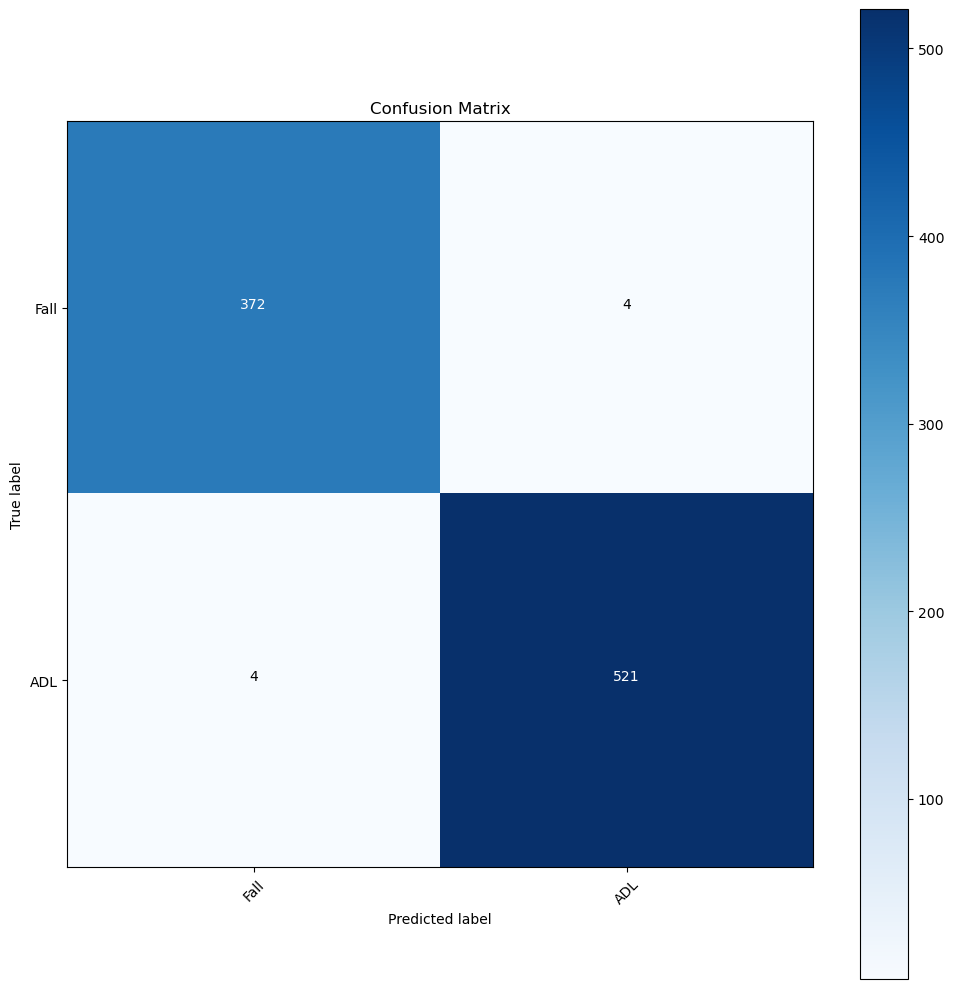

In [ ]:
cnf = fn.confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf, classes=['Fall', 'ADL'], normalize=False, title='Confusion Matrix')


# tsfresh:

In [54]:
df_time = np.arange(0, len(trimmed_data[0][0, :])) / 200  # Assuming a sampling rate of 200 Hz



In [55]:
type(df_time)

numpy.ndarray

In [56]:
df_time

array([0.000e+00, 5.000e-03, 1.000e-02, ..., 9.980e+00, 9.985e+00,
       9.990e+00])

In [57]:
# create a dataframe for the time and 3-axis accelerometer data and 3-axis gyroscope data

df = pd.DataFrame({
    'ID': '1',
    'Tag': f'{activity_code_list[0]}',
    'Time': df_time,
    'Acc X': trimmed_data[0][0, :],
    'Acc Y': trimmed_data[0][1, :],
    'Acc Z': trimmed_data[0][2, :],
    'Gyro X': trimmed_data[0][3, :],
    'Gyro Y': trimmed_data[0][4, :],
    'Gyro Z': trimmed_data[0][5, :]
})


In [58]:
df

ID  Tag   Time  Acc X  Acc Y  Acc Z  Gyro X  Gyro Y  Gyro Z
0     1  D01  0.000     80   -252   -111    -340     228     582
1     1  D01  0.005     81   -263   -100    -309     284     573
2     1  D01  0.010     83   -274    -83    -277     322     565
3     1  D01  0.015     83   -290    -78    -232     348     547
4     1  D01  0.020     87   -308    -70    -192     368     530
...  ..  ...    ...    ...    ...    ...     ...     ...     ...
1994  1  D01  9.970     23   -261    -45    -124    -237     167
1995  1  D01  9.975     37   -271    -53    -255    -180     122
1996  1  D01  9.980     41   -286    -54    -398    -141      76
1997  1  D01  9.985     41   -304    -39    -521    -104      44
1998  1  D01  9.990     38   -312    -12    -574     -55      18

[1999 rows x 9 columns]

In [59]:
id_list = np.arange(1, len(trimmed_data) + 1)
id_list

array([   1,    2,    3, ..., 4503, 4504, 4505])

In [ ]:
df_all = fn.ts_fresh_format(trimmed_data, activity_code_list)
df_all

Progress: 100%
✅ Finished creating the DataFrame.


ID  Tag   Time  Acc X  Acc Y  Acc Z  Gyro X  Gyro Y  Gyro Z
0           1  D01  0.000     80   -252   -111    -340     228     582
1           1  D01  0.005     81   -263   -100    -309     284     573
2           1  D01  0.010     83   -274    -83    -277     322     565
3           1  D01  0.015     83   -290    -78    -232     348     547
4           1  D01  0.020     87   -308    -70    -192     368     530
...       ...  ...    ...    ...    ...    ...     ...     ...     ...
9005490  4505  D17  9.970    -63   -156   -212     118    -227     449
9005491  4505  D17  9.975    -66   -166   -212     126    -252     451
9005492  4505  D17  9.980    -66   -176   -212     130    -282     451
9005493  4505  D17  9.985    -66   -179   -211     127    -309     447
9005494  4505  D17  9.990    -62   -181   -217     117    -327     443

[9005495 rows x 9 columns]

In [62]:
df_all.head()

ID  Tag   Time  Acc X  Acc Y  Acc Z  Gyro X  Gyro Y  Gyro Z
0   1  D01  0.000     80   -252   -111    -340     228     582
1   1  D01  0.005     81   -263   -100    -309     284     573
2   1  D01  0.010     83   -274    -83    -277     322     565
3   1  D01  0.015     83   -290    -78    -232     348     547
4   1  D01  0.020     87   -308    -70    -192     368     530

In [63]:
from tsfresh.feature_extraction import MinimalFCParameters
from tsfresh import extract_features

In [64]:
df_tsfresh = pd.melt(
    df_all,
    id_vars=['ID', 'Time', 'Tag'],
    value_vars=['Acc X', 'Acc Y', 'Acc Z', 'Gyro X', 'Gyro Y', 'Gyro Z'],
    var_name='feature',
    value_name='value'
)


In [ ]:

minimal_features = MinimalFCParameters()

extracted_features_minimal = extract_features(
    df_tsfresh,
    column_id='ID',
    column_sort='Time',
    column_kind='feature',
    column_value='value',
    default_fc_parameters=minimal_features,
    n_jobs=1  # Set to -1 for all CPUs or a specific number
)

Feature Extraction: 100%|██████████| 160/160 [00:46<00:00,  3.48it/s]


In [88]:
# save extracted_features_minimal
extracted_features_minimal.to_csv('extracted_features_minimal.csv', index=True)

extracted_features_minimal

Acc X__sum_values  Acc X__median  Acc X__mean  Acc X__length  \
1               17931.0           10.0     8.969985         1999.0   
2               23051.0            8.0    11.531266         1999.0   
3               20119.0            9.0    10.064532         1999.0   
4               19592.0           19.0     9.800900         1999.0   
5                6942.0            7.0     3.472736         1999.0   
...                 ...            ...          ...            ...   
4501            36311.0           34.0    18.164582         1999.0   
4502            87516.0           47.0    43.779890         1999.0   
4503           -15267.0          -15.0    -7.637319         1999.0   
4504            42153.0           21.0    21.087044         1999.0   
4505            58747.0           40.0    29.388194         1999.0   

      Acc X__standard_deviation  Acc X__variance  Acc X__root_mean_square  \
1                     36.880458      1360.168184                37.955616   
2                     62.467936      3902.243019                63.523327   
3                    120.404364     14497.210943               120.824276   
4                    186.642721     34835.505132               186.899874   
5                     30.710286       943.121693                30.906012   
...                         ...              ...                      ...   
4501                  51.083855      2609.560206                54.217269   
4502                  27.502978       756.413783                51.701959   
4503                  48.451283      2347.526791                49.049520   
4504                  47.466693      2253.086971                51.939873   
4505                  48.128490      2316.351556                56.391644   

      Acc X__maximum  Acc X__absolute_maximum  Acc X__minimum  ...  \
1              128.0                    128.0          -113.0  ...   
2              190.0                    190.0          -174.0  ...   
3              490.0                    490.0          -370.0  ...   
4              625.0                    708.0          -708.0  ...   
5              103.0                    180.0          -180.0  ...   
...              ...                      ...             ...  ...   
4501           137.0                    194.0          -194.0  ...   
4502           144.0                    144.0           -81.0  ...   
4503           128.0                    176.0          -176.0  ...   
4504           139.0                    183.0          -183.0  ...   
4505           135.0                    159.0          -159.0  ...   

      Gyro Z__sum_values  Gyro Z__median  Gyro Z__mean  Gyro Z__length  \
1               -10090.0            12.0     -5.047524          1999.0   
2               -47153.0            24.0    -23.588294          1999.0   
3               -47268.0           -54.0    -23.645823          1999.0   
4               -94721.0            57.0    -47.384192          1999.0   
5                 8747.0             2.0      4.375688          1999.0   
...                  ...             ...           ...             ...   
4501             -9627.0            -3.0     -4.815908          1999.0   
4502             32082.0            -1.0     16.049025          1999.0   
4503            -62227.0            -3.0    -31.129065          1999.0   
4504             -2301.0            -2.0     -1.151076          1999.0   
4505              8531.0            -3.0      4.267634          1999.0   

      Gyro Z__standard_deviation  Gyro Z__variance  Gyro Z__root_mean_square  \
1                     427.824521      1.830338e+05                427.854296   
2                     644.859371      4.158436e+05                645.290645   
3                     985.310691      9.708372e+05                985.594380   
4                    1300.774672      1.692015e+06               1301.637434   
5                     274.719078      7.547057e+04                274.753923   
...                          .

In [ ]:
run = False     # Set to True to run the feature extraction
if run:
    # Extract features using tsfresh
    extracted_features = extract_features(
        df_tsfresh,
        column_id='ID',
        column_sort='Time',
        column_kind='feature',
        column_value='value',
        n_jobs=1
    )


Feature Extraction: 100%|██████████| 27030/27030 [20:32:12<00:00,  2.74s/it]   


In [ ]:
# save the extracted features to a csv file
extracted_features.to_csv('extracted_features.csv', index=True)

In [87]:
extracted_features

Acc X__variance_larger_than_standard_deviation  \
1                                                1.0   
2                                                1.0   
3                                                1.0   
4                                                1.0   
5                                                1.0   
...                                              ...   
4501                                             1.0   
4502                                             1.0   
4503                                             1.0   
4504                                             1.0   
4505                                             1.0   

      Acc X__has_duplicate_max  Acc X__has_duplicate_min  \
1                          1.0                       1.0   
2                          0.0                       0.0   
3                          0.0                       0.0   
4                          0.0                       0.0   
5                          0.0                       0.0   
...                        ...                       ...   
4501                       1.0                       0.0   
4502                       0.0                       0.0   
4503                       0.0                       0.0   
4504                       0.0                       0.0   
4505                       0.0                       0.0   

      Acc X__has_duplicate  Acc X__sum_values  Acc X__abs_energy  \
1                      1.0            17931.0          2879817.0   
2                      1.0            23051.0          8066391.0   
3                      1.0            20119.0         29182413.0   
4                      1.0            19592.0         69828194.0   
5                      1.0             6942.0          1909408.0   
...                    ...                ...                ...   
4501                   1.0            36311.0          5876085.0   
4502                   1.0            87516.0          5343512.0   
4503                   1.0           -15267.0          4809305.0   
4504                   1.0            42153.0          5392803.0   
4505                   1.0            58747.0          6356855.0   

      Acc X__mean_abs_change  Acc X__mean_change  \
1                   5.446446           -0.021021   
2                   9.539039           -0.027528   
3                  27.133133            0.031031   
4                  46.245746            0.001502   
5                   3.879880           -0.015015   
...                      ...                 ...   
4501                2.637638            0.022022   
4502                2.385886           -0.011512   
4503                2.507007            0.071572   
4504                2.600601            0.049049   
4505                2.600100            0.006507   

      Acc X__mean_second_derivative_central  Acc X__median  ...  \
1                                 -0.001002           10.0  ...   
2                                 -0.007511            8.0  ...   
3                                  0.001502            9.0  ...   
4                                 -0.004757           19.0  ...   
5                                  0.001252            7.0  ...   
...                                     ...            ...  ...   
4501                              -0.002253           34.0  ...   
4502                              -0.000250           47.0  ...   
4503                               0.000250          -15.0  ...   
4504                              -0.001252           21.0  ...   
4505                               0.001502           40.0  ...   

      Gyro Z__fourier_entropy__bins_5  Gyro Z__fourier_entropy__bins_10  \
1                            0.170467                          0.226363   
2                            0.215617                          0.260704   
3                            0.228465                          0.290926   
4                            0.136002                          0.

In [89]:
extracted_features.describe()

Acc X__variance_larger_than_standard_deviation  \
count                                          4505.0   
mean                                              1.0   
std                                               0.0   
min                                               1.0   
25%                                               1.0   
50%                                               1.0   
75%                                               1.0   
max                                               1.0   

       Acc X__has_duplicate_max  Acc X__has_duplicate_min  \
count               4505.000000               4505.000000   
mean                   0.106770                  0.095671   
std                    0.308855                  0.294173   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    0.000000                  0.000000   
max                    1.000000                  1.000000   

       Acc X__has_duplicate  Acc X__sum_values  Acc X__abs_energy  \
count                4505.0        4505.000000       4.505000e+03   
mean                    1.0       -3110.557159       2.808371e+07   
std                     0.0      170479.810471       3.540790e+07   
min                     1.0     -483028.000000       2.568500e+04   
25%                     1.0      -45475.000000       1.024830e+06   
50%                     1.0        3547.000000       6.882709e+06   
75%                     1.0       45554.000000       5.558755e+07   
max                     1.0      534539.000000       1.627350e+08   

       Acc X__mean_abs_change  Acc X__mean_change  \
count             4505.000000         4505.000000   
mean                 4.870611           -0.005217   
std                  3.845068            0.057720   
min                  1.586086           -0.268769   
25%                  2.530030           -0.016016   
50%                  3.513514           -0.000501   
75%                  6.084585            0.006006   
max                 49.050551            0.205205   

       Acc X__mean_second_derivative_central  Acc X__median  ...  \
count                           4.505000e+03    4505.000000  ...   
mean                           -3.334636e-07      -2.011987  ...   
std                             3.014048e-03     110.330842  ...   
min                            -3.955934e-02    -263.000000  ...   
25%                            -7.511267e-04     -18.000000  ...   
50%                             0.000000e+00       3.000000  ...   
75%                             7.511267e-04      23.000000  ...   
max                             1.041562e-01     278.000000  ...   

       Gyro Z__fourier_entropy__bins_5  Gyro Z__fourier_entropy__bins_10  \
count                      4505.000000                       4505.000000   
mean                          0.202253                          0.297871   
std                           0.104603                          0.151829   
min                           0.045395                          0.045395   
25%                           0.136002                          0.181214   
50%                           0.170467                          0.260704   
75%                           0.249958                          0.378036   
max                           1.044253                          1.590436   

       Gyro Z__fourier_entropy__bins_100  \
count                        4505.000000   
mean                            0.695070   
std                             0.313604   
min                             0.181214   
25%                             0.476539   
50%                             0.627293   
75%                             0.835058   
max                             3.457534   

       Gyro Z__permutation_entropy__dimension_3__tau_1  \
count                                      4505.000000   
mean                            

In [90]:
# count number of features in extracted_features
num_features = len(extracted_features.columns)
print(f"Number of features extracted: {num_features}")

Number of features extracted: 4698


In [69]:

# Get labels (y) for classification
# y = df_all[['ID', 'Tag']].drop_duplicates().set_index('ID')['Tag']


In [70]:
# df_long = convert_to_tsfresh_format(trimmed_data)

In [71]:
# import yaml
# import zipfile

# # Read YAML file
# with open('config.yaml', 'r') as f:
#     config = yaml.safe_load(f)

# # Get the file path from YAML
# file_path = config['file_path']

# # Open the ZIP file
# with zipfile.ZipFile(file_path, 'r') as zip_ref:
#     zip_ref.extractall('unzipped_dataset')  # Extract to this folder
#     print("Files extracted to 'unzipped_dataset'")

